In [ ]:
import pandas as pd


In [2]:
import pandas as pd

df_train = pd.read_csv('/home/ankur/Desktop/ML_DL_Projects/data/cmi-detect-behavior-with-sensor-data/train.csv')
df_train.head()


row_id sequence_type sequence_id  sequence_counter      subject  \
0  SEQ_000007_000000        Target  SEQ_000007                 0  SUBJ_059520   
1  SEQ_000007_000001        Target  SEQ_000007                 1  SUBJ_059520   
2  SEQ_000007_000002        Target  SEQ_000007                 2  SUBJ_059520   
3  SEQ_000007_000003        Target  SEQ_000007                 3  SUBJ_059520   
4  SEQ_000007_000004        Target  SEQ_000007                 4  SUBJ_059520   

                       orientation                                   behavior  \
0  Seated Lean Non Dom - FACE DOWN  Relaxes and moves hand to target location   
1  Seated Lean Non Dom - FACE DOWN  Relaxes and moves hand to target location   
2  Seated Lean Non Dom - FACE DOWN  Relaxes and moves hand to target location   
3  Seated Lean Non Dom - FACE DOWN  Relaxes and moves hand to target location   
4  Seated Lean Non Dom - FACE DOWN  Relaxes and moves hand to target location   

        phase             gesture     acc_x  ...  tof_5_v54  tof_5_v55  \
0  Transition  Cheek - pinch skin  6.683594  ...       -1.0       -1.0   
1  Transition  Cheek - pinch skin  6.949219  ...       -1.0       -1.0   
2  Transition  Cheek - pinch skin  5.722656  ...       -1.0       -1.0   
3  Transition  Cheek - pinch skin  6.601562  ...       -1.0       -1.0   
4  Transition  Cheek - pinch skin  5.566406  ...       -1.0       -1.0   

   tof_5_v56  tof_5_v57  tof_5_v58  tof_5_v59  tof_5_v60  tof_5_v61  \
0       -1.0       -1.0       -1.0       -1.0       -1.0       -1.0   
1       -1.0       -1.0       -1.0       -1.0       -1.0       -1.0   
2      112.0      119.0       -1.0       -1.0       -1.0       -1.0   
3      101.0      111.0       -1.0       -1.0       -1.0       -1.0   
4      101.0      109.0      125.0       -1.0       -1.0       -1.0   

   tof_5_v62  tof_5_v63  
0       -1.0       -1.0  
1       -1.0       -1.0  
2       -1.0       -1.0  
3       -1.0       -1.0  
4       -1.0       -1.0  

[5 rows x 341 columns]

In [7]:
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574945 entries, 0 to 574944
Columns: 341 entries, row_id to tof_5_v63
dtypes: float64(332), int64(1), object(8)
memory usage: 1.5+ GB


In [4]:
df_train['sequence_id'].value_counts().max()


np.int64(700)

In [9]:
# Comprehensive Data Visualization for Sensor Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

=== DATA OVERVIEW ===
Dataset shape: (574945, 341)
Memory usage: 1.70 GB
Missing values: 3597807

=== CATEGORICAL VARIABLES ===
Categorical columns: ['row_id', 'sequence_type', 'sequence_id', 'subject', 'orientation', 'behavior', 'phase', 'gesture']


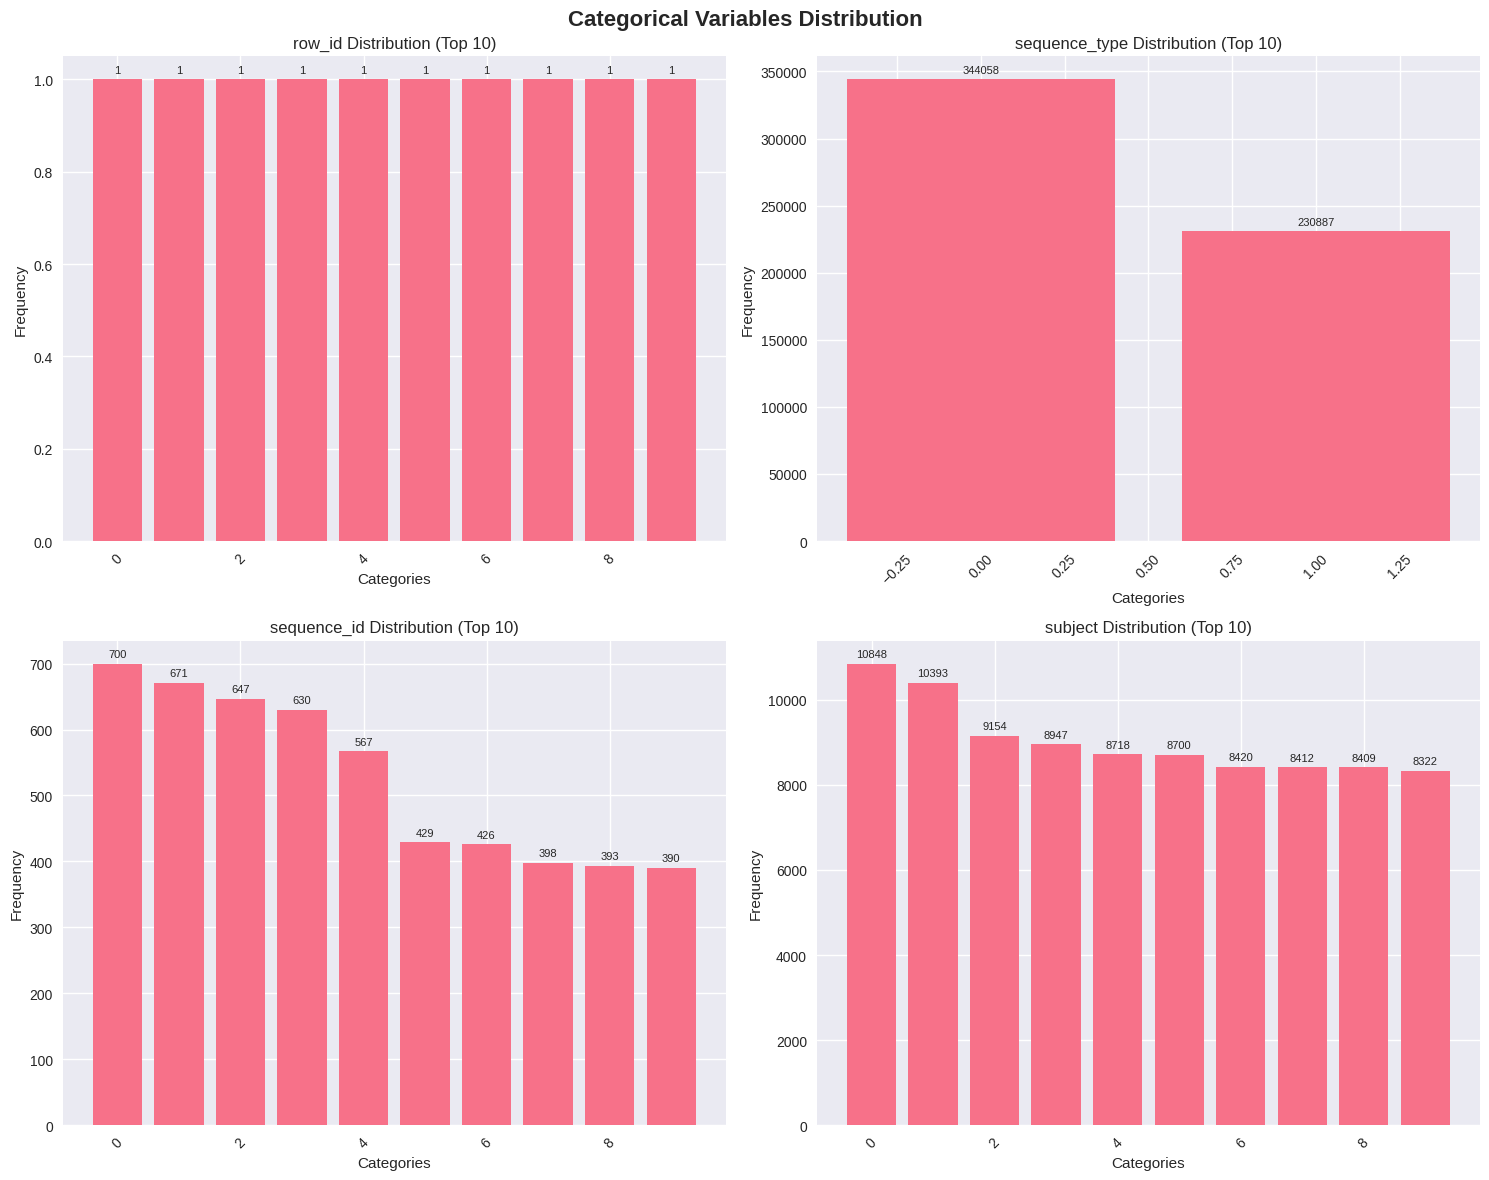

In [10]:
# 1. DATA OVERVIEW AND BASIC STATISTICS
print("=== DATA OVERVIEW ===")
print(f"Dataset shape: {df_train.shape}")
print(f"Memory usage: {df_train.memory_usage(deep=True).sum() / 1024**3:.2f} GB")
print(f"Missing values: {df_train.isnull().sum().sum()}")

# 2. CATEGORICAL VARIABLES ANALYSIS
print("\n=== CATEGORICAL VARIABLES ===")
categorical_cols = df_train.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")

# Create subplots for categorical variables
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Categorical Variables Distribution', fontsize=16, fontweight='bold')

for i, col in enumerate(categorical_cols[:4]):
    row, col_idx = i // 2, i % 2
    value_counts = df_train[col].value_counts()
    
    # Plot top 10 categories
    top_10 = value_counts.head(10)
    axes[row, col_idx].bar(range(len(top_10)), top_10.values)
    axes[row, col_idx].set_title(f'{col} Distribution (Top 10)')
    axes[row, col_idx].set_xlabel('Categories')
    axes[row, col_idx].set_ylabel('Frequency')
    axes[row, col_idx].tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for j, v in enumerate(top_10.values):
        axes[row, col_idx].text(j, v + max(top_10.values)*0.01, str(v), 
                               ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [11]:
# 3. NUMERICAL VARIABLES ANALYSIS
print("\n=== NUMERICAL VARIABLES ANALYSIS ===")
numerical_cols = df_train.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns: {len(numerical_cols)}")

# Group numerical columns by sensor type
sensor_groups = {
    'Accelerometer': [col for col in numerical_cols if col.startswith('acc')],
    'Rotation': [col for col in numerical_cols if col.startswith('rot')],
    'Thermal': [col for col in numerical_cols if col.startswith('thm')],
    'Time of Flight': [col for col in numerical_cols if col.startswith('tof')]
}

print("\nSensor groups:")
for sensor_type, cols in sensor_groups.items():
    print(f"{sensor_type}: {len(cols)} columns")


=== NUMERICAL VARIABLES ANALYSIS ===
Numerical columns: 333

Sensor groups:
Accelerometer: 3 columns
Rotation: 4 columns
Thermal: 5 columns
Time of Flight: 320 columns


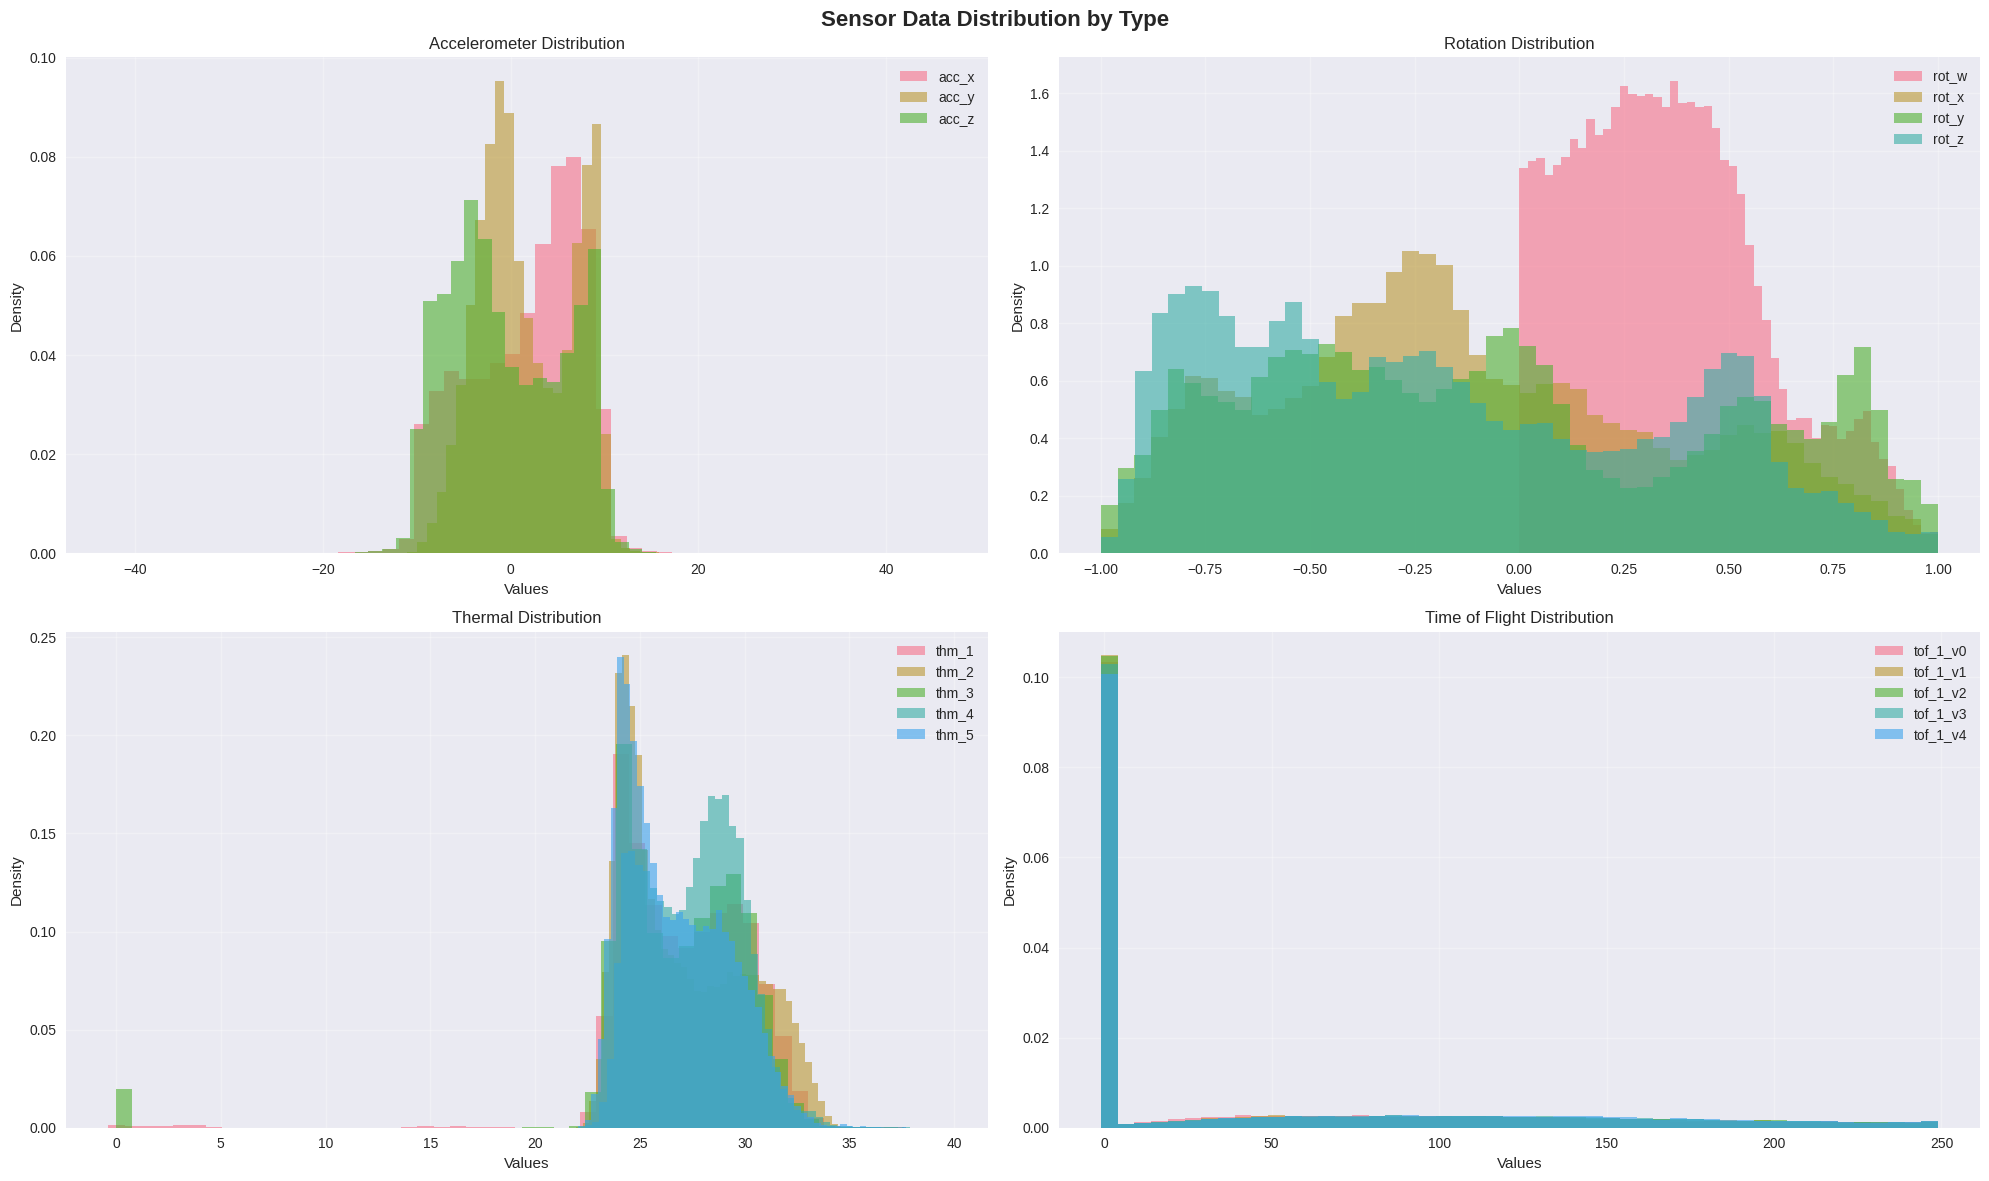

In [12]:
# 4. HISTOGRAM ANALYSIS FOR DIFFERENT SENSOR TYPES
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Sensor Data Distribution by Type', fontsize=16, fontweight='bold')

for i, (sensor_type, cols) in enumerate(sensor_groups.items()):
    row, col_idx = i // 2, i % 2
    
    if cols:
        # Sample a few columns for visualization
        sample_cols = cols[:5] if len(cols) > 5 else cols
        
        for col in sample_cols:
            data = df_train[col].dropna()
            if len(data) > 0:
                axes[row, col_idx].hist(data, bins=50, alpha=0.6, label=col, density=True)
        
        axes[row, col_idx].set_title(f'{sensor_type} Distribution')
        axes[row, col_idx].set_xlabel('Values')
        axes[row, col_idx].set_ylabel('Density')
        axes[row, col_idx].legend()
        axes[row, col_idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


=== CORRELATION ANALYSIS ===


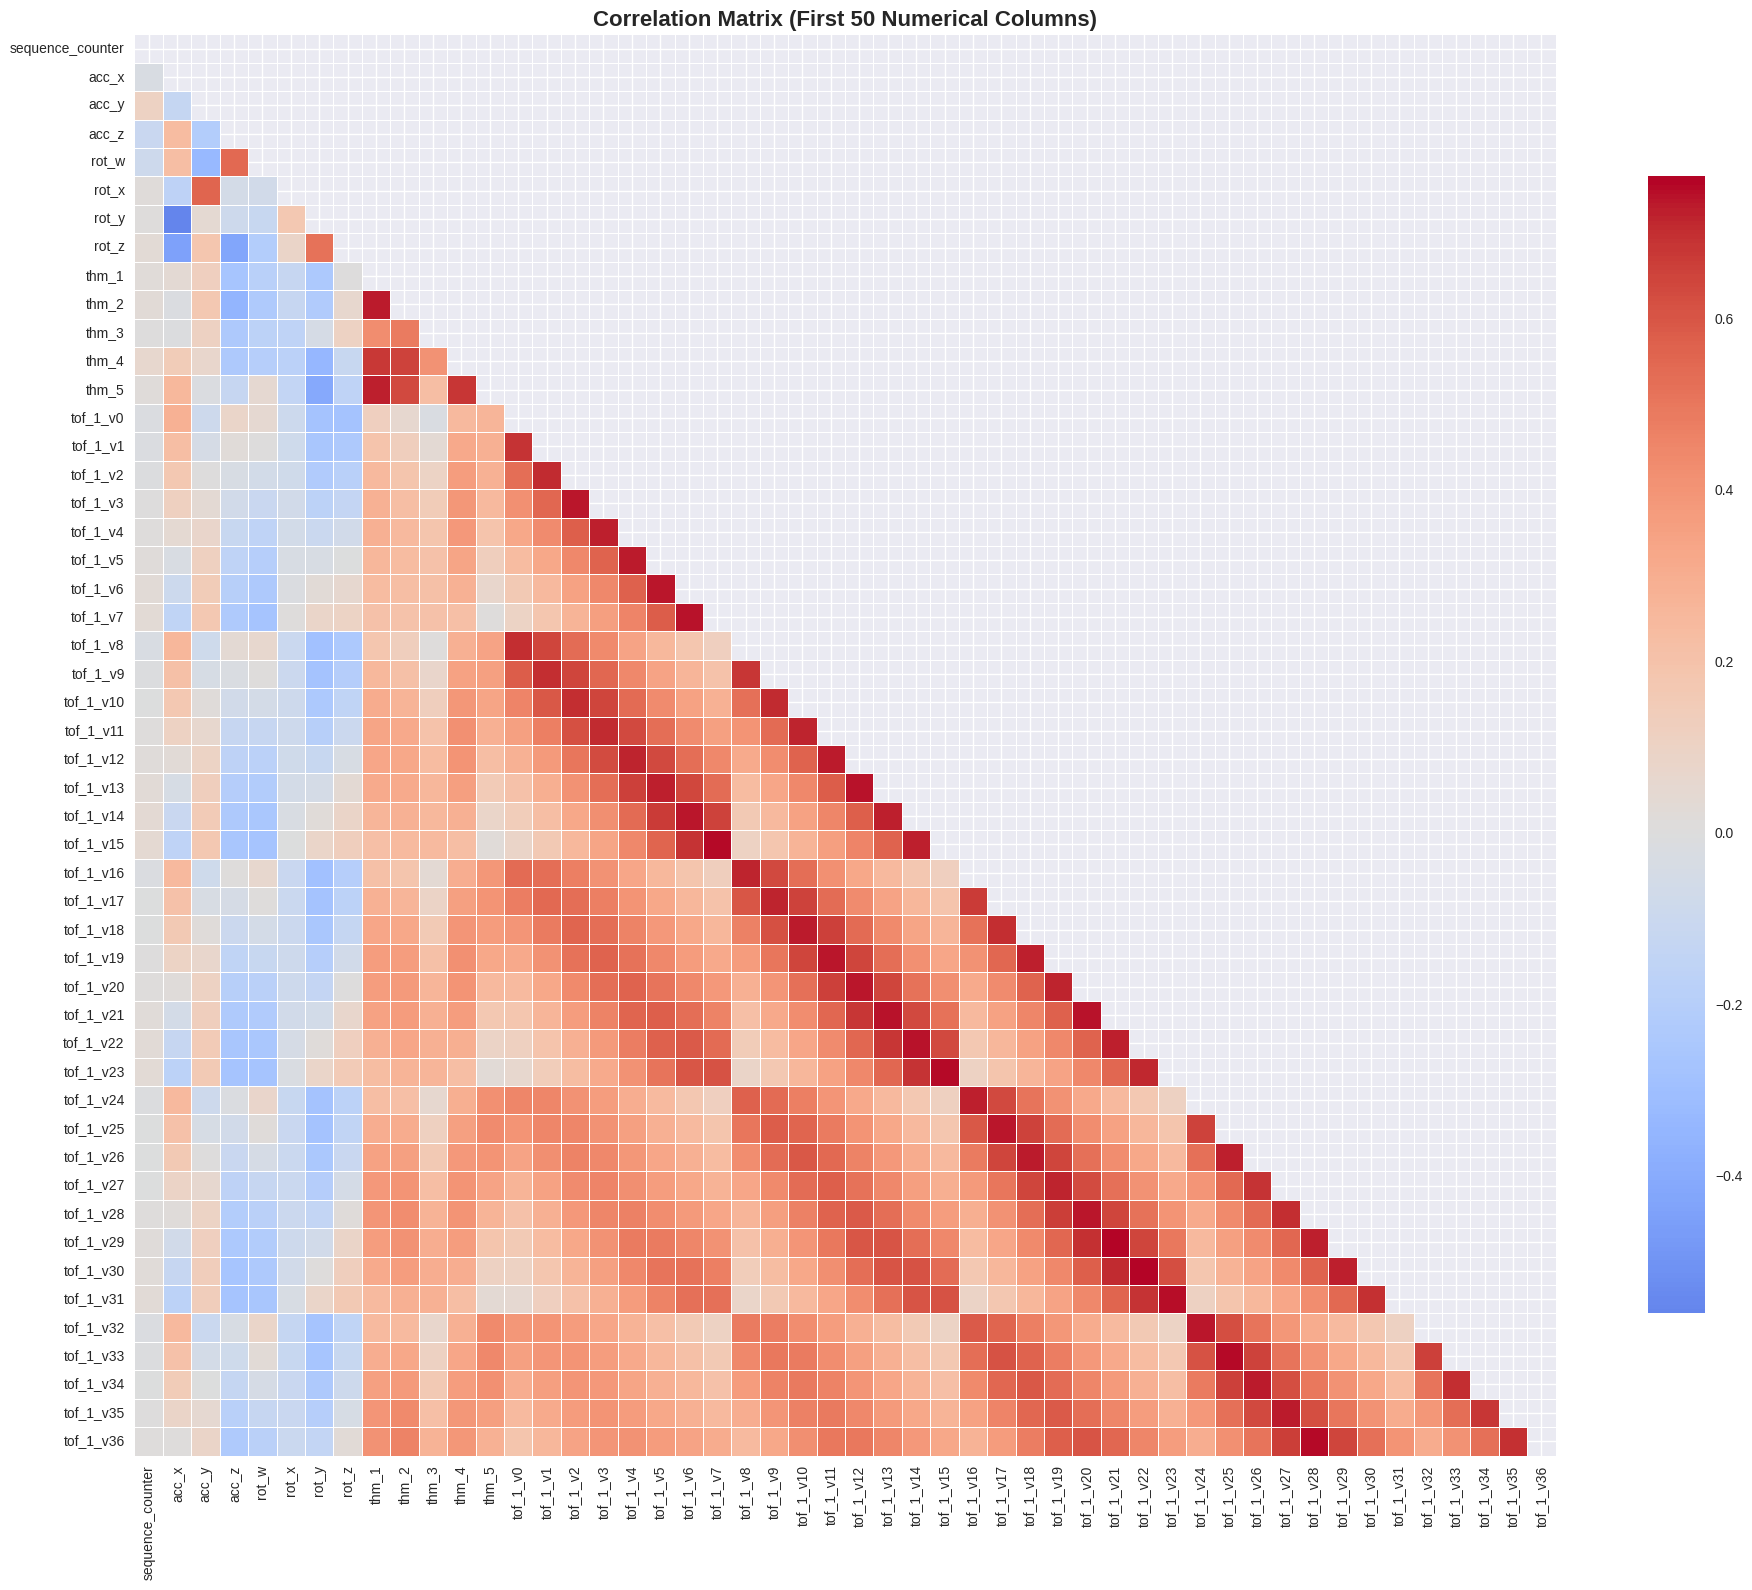

In [13]:
# 5. CORRELATION ANALYSIS
print("\n=== CORRELATION ANALYSIS ===")

# Calculate correlation for a subset of numerical columns (to avoid memory issues)
sample_numerical = numerical_cols[:50]  # First 50 numerical columns
correlation_matrix = df_train[sample_numerical].corr()

# Plot correlation heatmap
plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix (First 50 Numerical Columns)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


=== SCATTER PLOT ANALYSIS ===


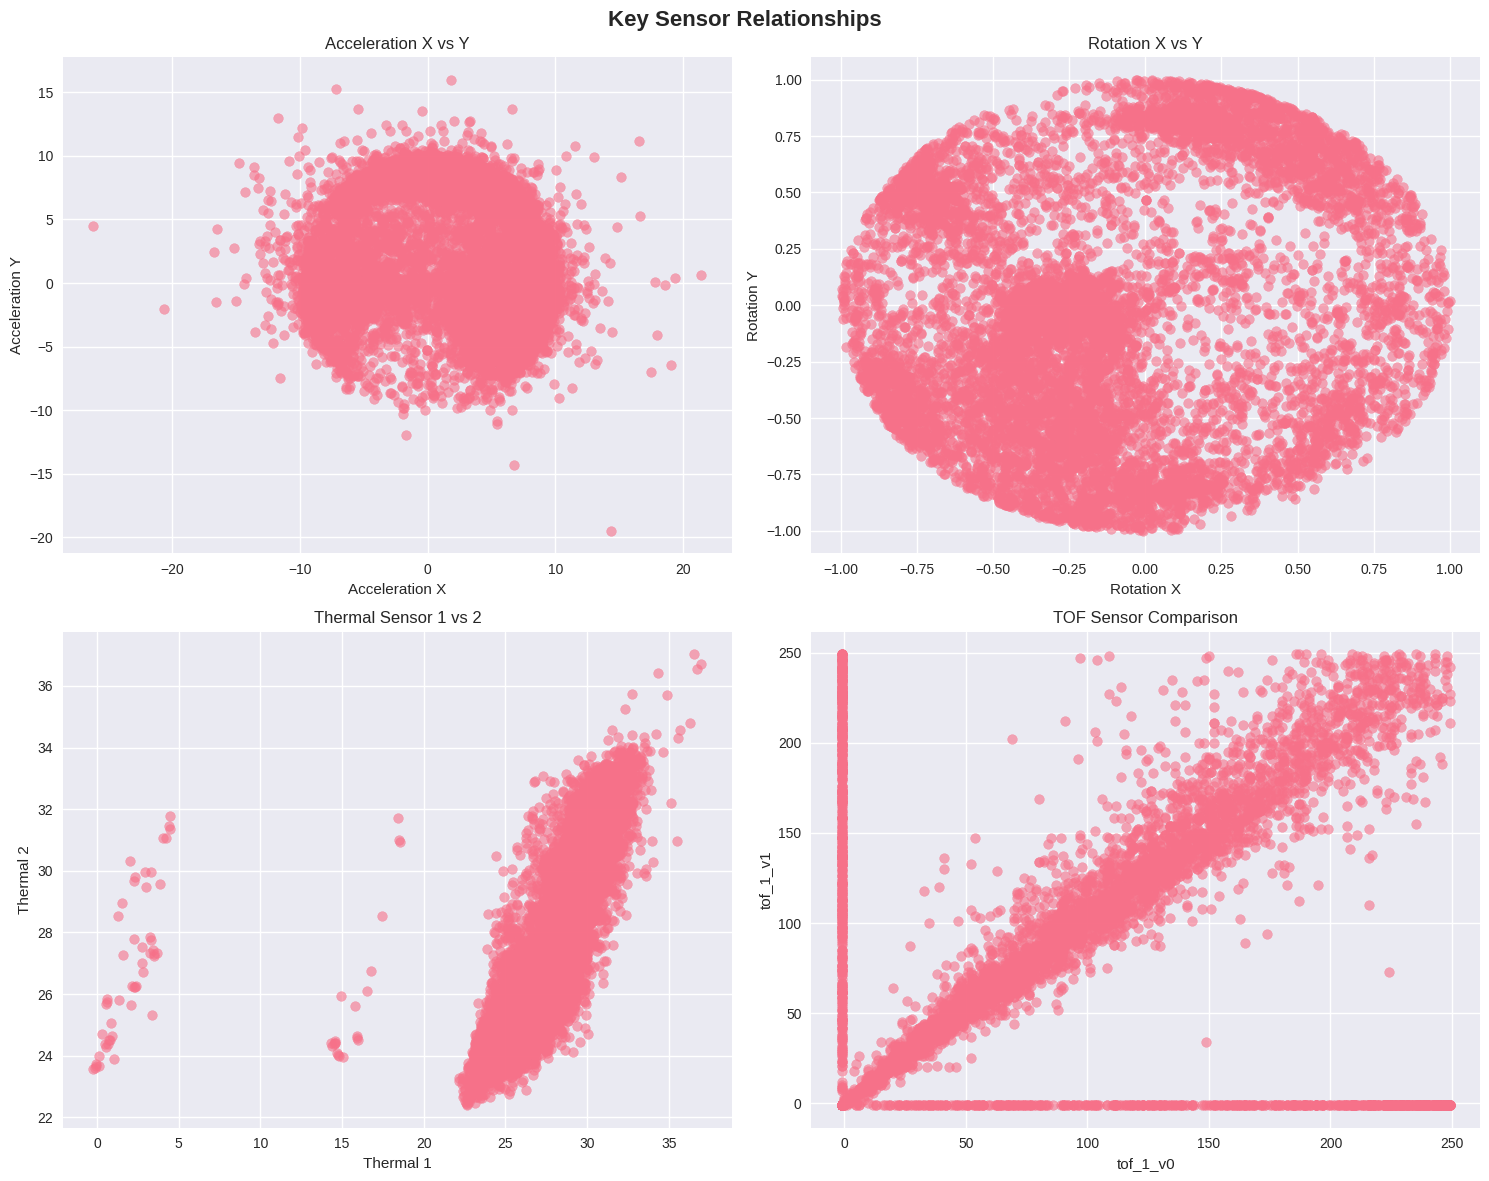

In [14]:
# 6. SCATTER PLOT ANALYSIS
print("\n=== SCATTER PLOT ANALYSIS ===")

# Create scatter plots for key sensor pairs
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Key Sensor Relationships', fontsize=16, fontweight='bold')

# Sample data for performance
sample_data = df_train.sample(n=10000)

# Accelerometer relationships
if 'acc_x' in df_train.columns and 'acc_y' in df_train.columns:
    axes[0, 0].scatter(sample_data['acc_x'], sample_data['acc_y'], alpha=0.6)
    axes[0, 0].set_xlabel('Acceleration X')
    axes[0, 0].set_ylabel('Acceleration Y')
    axes[0, 0].set_title('Acceleration X vs Y')

# Rotation relationships
if 'rot_x' in df_train.columns and 'rot_y' in df_train.columns:
    axes[0, 1].scatter(sample_data['rot_x'], sample_data['rot_y'], alpha=0.6)
    axes[0, 1].set_xlabel('Rotation X')
    axes[0, 1].set_ylabel('Rotation Y')
    axes[0, 1].set_title('Rotation X vs Y')

# Thermal sensor relationships
if 'thm_1' in df_train.columns and 'thm_2' in df_train.columns:
    axes[1, 0].scatter(sample_data['thm_1'], sample_data['thm_2'], alpha=0.6)
    axes[1, 0].set_xlabel('Thermal 1')
    axes[1, 0].set_ylabel('Thermal 2')
    axes[1, 0].set_title('Thermal Sensor 1 vs 2')

# Time of Flight relationships (first two TOF sensors)
tof_cols = [col for col in numerical_cols if col.startswith('tof_1_v')]
if len(tof_cols) >= 2:
    axes[1, 1].scatter(sample_data[tof_cols[0]], sample_data[tof_cols[1]], alpha=0.6)
    axes[1, 1].set_xlabel(tof_cols[0])
    axes[1, 1].set_ylabel(tof_cols[1])
    axes[1, 1].set_title('TOF Sensor Comparison')

plt.tight_layout()
plt.show()


=== TIME SERIES ANALYSIS ===


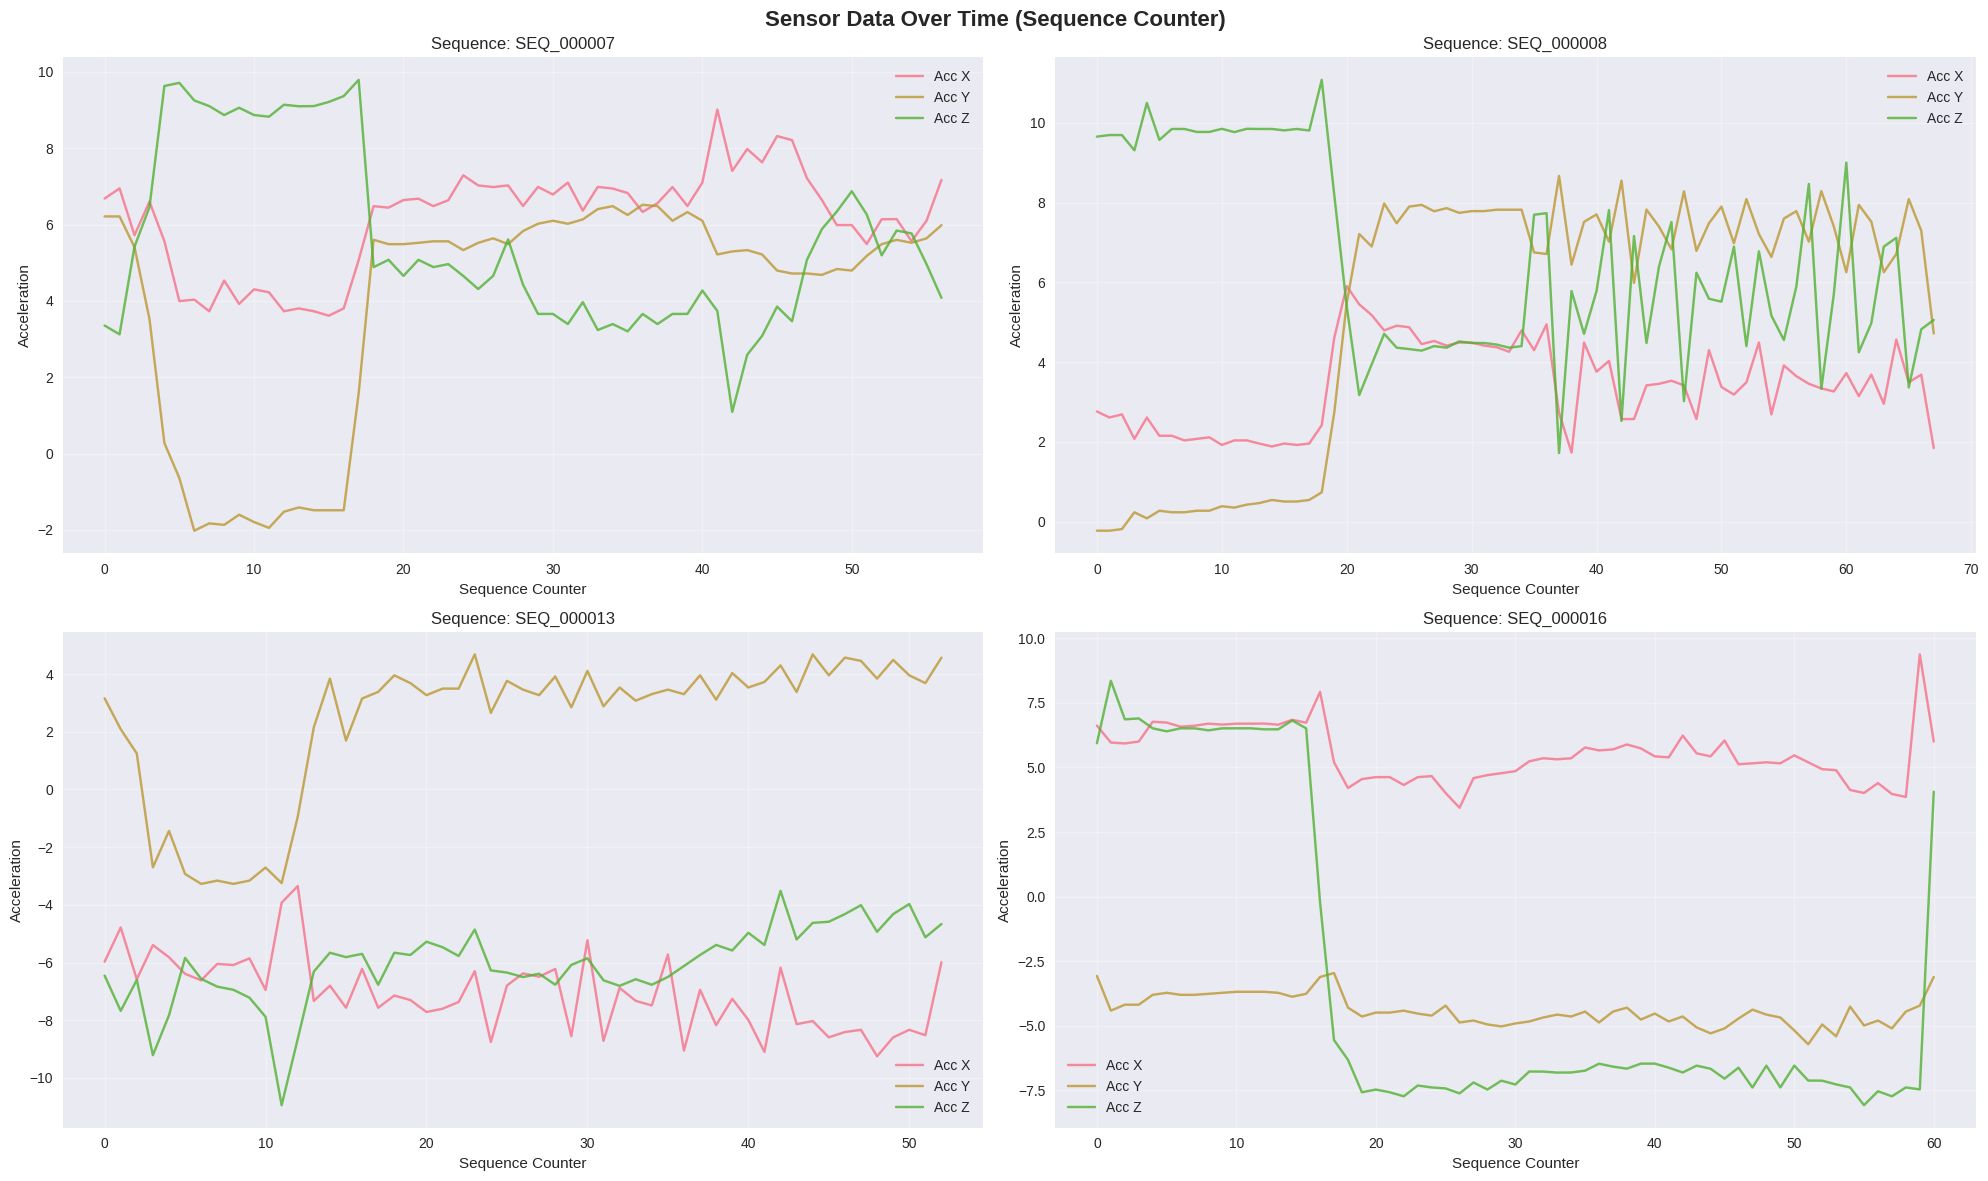

In [15]:
# 7. TIME SERIES ANALYSIS (Sequence Counter)
print("\n=== TIME SERIES ANALYSIS ===")

# Analyze data over sequence counter
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Sensor Data Over Time (Sequence Counter)', fontsize=16, fontweight='bold')

# Sample a few sequences for visualization
sample_sequences = df_train['sequence_id'].unique()[:4]

for i, seq_id in enumerate(sample_sequences):
    seq_data = df_train[df_train['sequence_id'] == seq_id]
    
    row, col_idx = i // 2, i % 2
    
    # Plot accelerometer data
    if 'acc_x' in seq_data.columns:
        axes[row, col_idx].plot(seq_data['sequence_counter'], seq_data['acc_x'], 
                               label='Acc X', alpha=0.8)
    if 'acc_y' in seq_data.columns:
        axes[row, col_idx].plot(seq_data['sequence_counter'], seq_data['acc_y'], 
                               label='Acc Y', alpha=0.8)
    if 'acc_z' in seq_data.columns:
        axes[row, col_idx].plot(seq_data['sequence_counter'], seq_data['acc_z'], 
                               label='Acc Z', alpha=0.8)
    
    axes[row, col_idx].set_title(f'Sequence: {seq_id}')
    axes[row, col_idx].set_xlabel('Sequence Counter')
    axes[row, col_idx].set_ylabel('Acceleration')
    axes[row, col_idx].legend()
    axes[row, col_idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


=== MISSING VALUES ANALYSIS ===


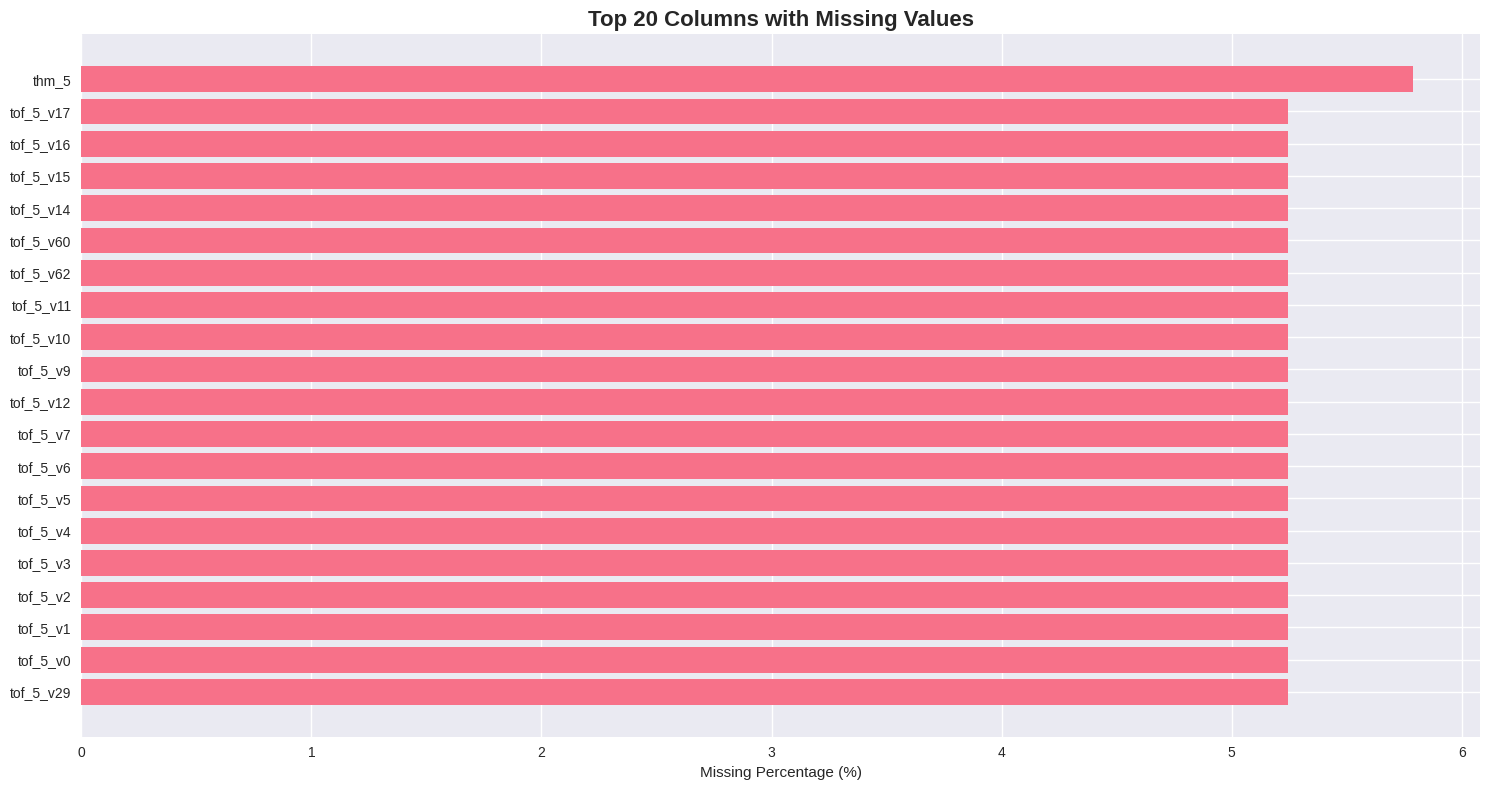

In [16]:
# 8. MISSING VALUES ANALYSIS
print("\n=== MISSING VALUES ANALYSIS ===")

# Calculate missing values percentage
missing_percentage = (df_train.isnull().sum() / len(df_train)) * 100
missing_df = pd.DataFrame({
    'Column': missing_percentage.index,
    'Missing_Percentage': missing_percentage.values
}).sort_values('Missing_Percentage', ascending=False)

# Plot missing values
plt.figure(figsize=(15, 8))
top_missing = missing_df.head(20)
plt.barh(range(len(top_missing)), top_missing['Missing_Percentage'])
plt.yticks(range(len(top_missing)), top_missing['Column'])
plt.xlabel('Missing Percentage (%)')
plt.title('Top 20 Columns with Missing Values', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


=== BEHAVIOR AND GESTURE ANALYSIS ===


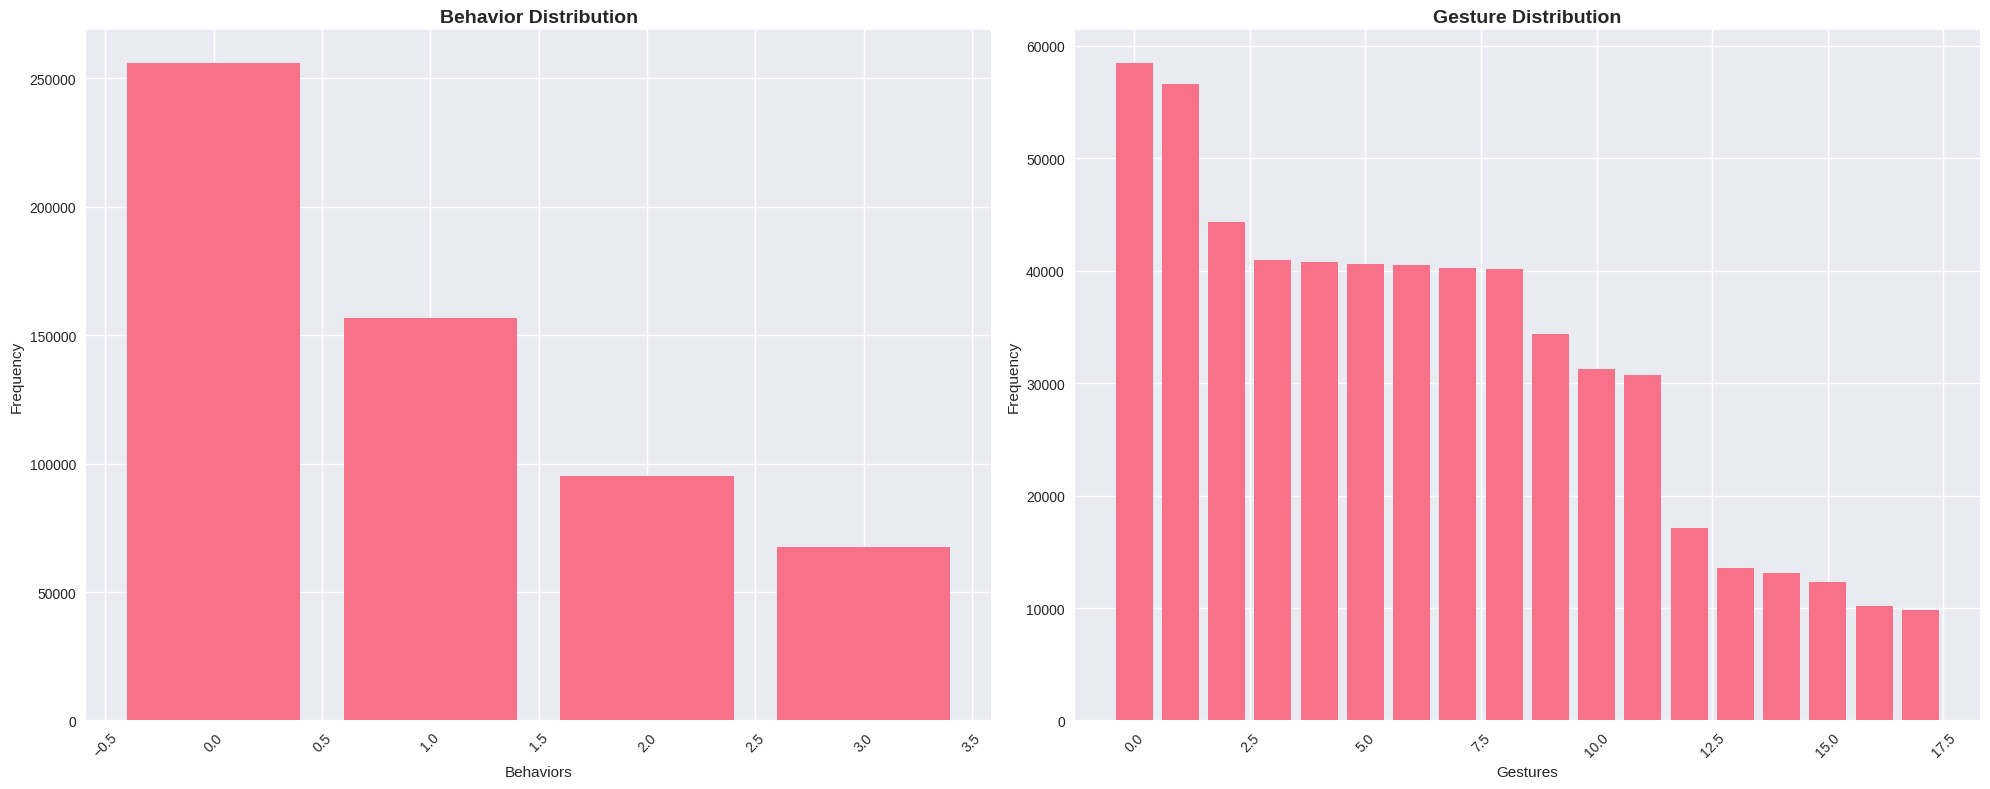

In [17]:
# 9. BEHAVIOR AND GESTURE ANALYSIS
print("\n=== BEHAVIOR AND GESTURE ANALYSIS ===")

if 'behavior' in df_train.columns and 'gesture' in df_train.columns:
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    # Behavior distribution
    behavior_counts = df_train['behavior'].value_counts()
    axes[0].bar(range(len(behavior_counts)), behavior_counts.values)
    axes[0].set_title('Behavior Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Behaviors')
    axes[0].set_ylabel('Frequency')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Gesture distribution
    gesture_counts = df_train['gesture'].value_counts()
    axes[1].bar(range(len(gesture_counts)), gesture_counts.values)
    axes[1].set_title('Gesture Distribution', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Gestures')
    axes[1].set_ylabel('Frequency')
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()


=== SUBJECT ANALYSIS ===


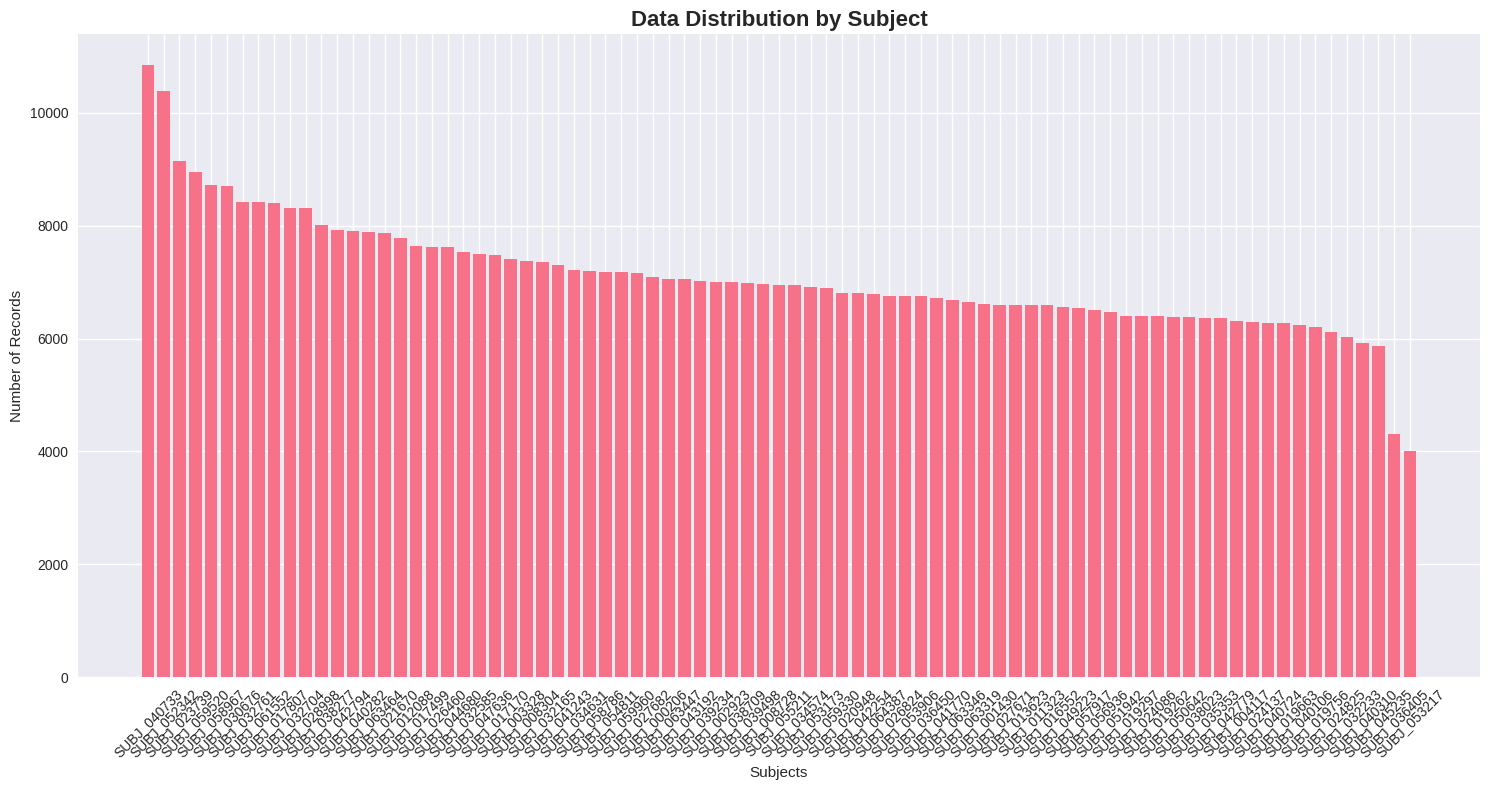

In [18]:
# 10. SUBJECT ANALYSIS
print("\n=== SUBJECT ANALYSIS ===")

if 'subject' in df_train.columns:
    subject_counts = df_train['subject'].value_counts()
    
    plt.figure(figsize=(15, 8))
    plt.bar(range(len(subject_counts)), subject_counts.values)
    plt.title('Data Distribution by Subject', fontsize=16, fontweight='bold')
    plt.xlabel('Subjects')
    plt.ylabel('Number of Records')
    plt.xticks(range(len(subject_counts)), subject_counts.index, rotation=45)
    plt.tight_layout()
    plt.show()


=== BOX PLOTS FOR SENSOR DATA ===


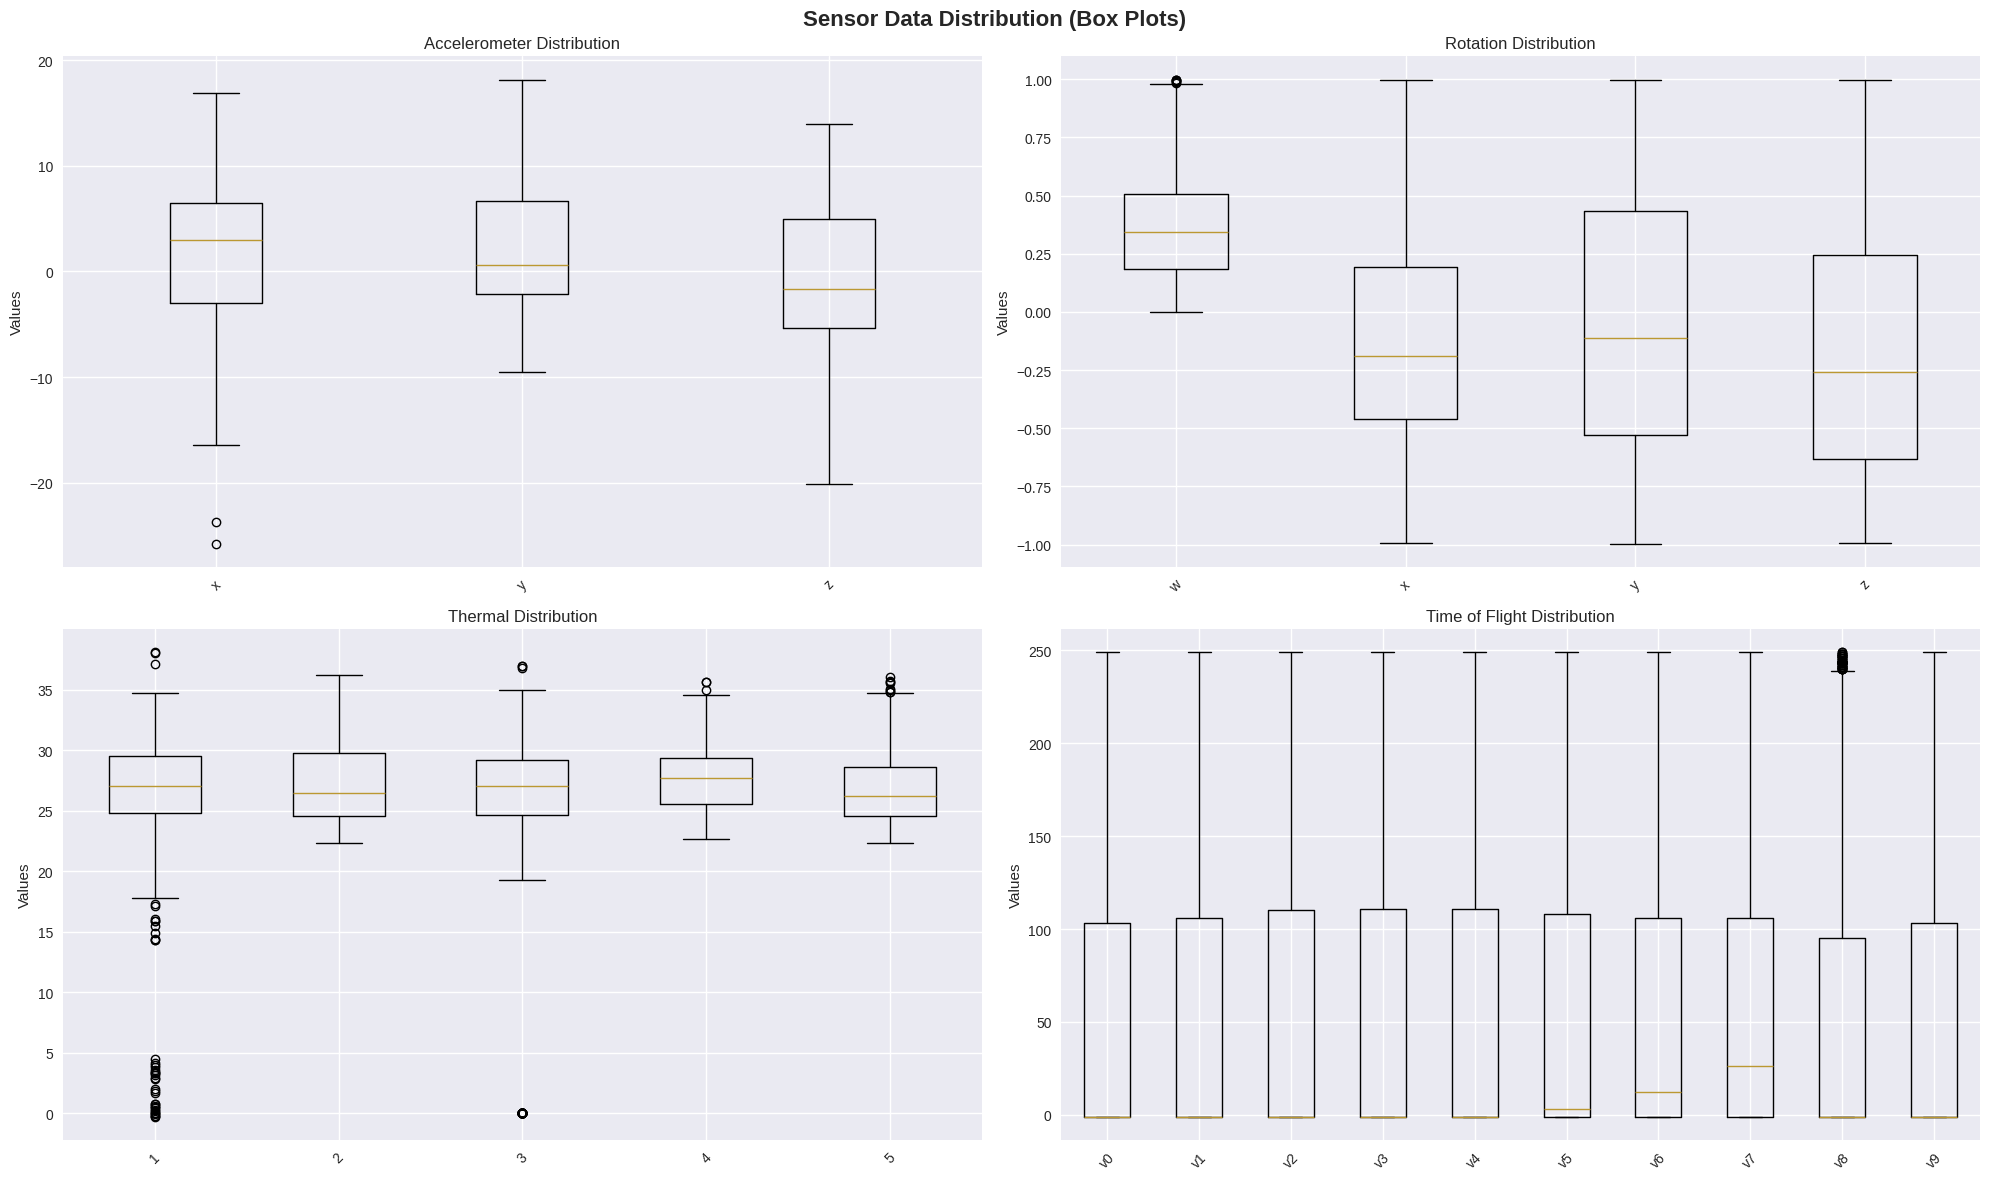

In [19]:
# 11. BOX PLOTS FOR SENSOR DATA
print("\n=== BOX PLOTS FOR SENSOR DATA ===")

# Create box plots for different sensor types
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Sensor Data Distribution (Box Plots)', fontsize=16, fontweight='bold')

# Sample data for box plots
sample_data = df_train.sample(n=5000)

for i, (sensor_type, cols) in enumerate(sensor_groups.items()):
    if cols:
        row, col_idx = i // 2, i % 2
        sample_cols = cols[:10] if len(cols) > 10 else cols  # Limit to 10 columns
        
        # Prepare data for box plot
        plot_data = []
        labels = []
        for col in sample_cols:
            data = sample_data[col].dropna()
            if len(data) > 0:
                plot_data.append(data)
                labels.append(col.split('_')[-1])  # Get last part of column name
        
        if plot_data:
            axes[row, col_idx].boxplot(plot_data, labels=labels)
            axes[row, col_idx].set_title(f'{sensor_type} Distribution')
            axes[row, col_idx].set_ylabel('Values')
            axes[row, col_idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [20]:
# 12. SUMMARY STATISTICS
print("\n=== SUMMARY STATISTICS ===")
print("\nDataset Summary:")
print(f"Total records: {len(df_train):,}")
print(f"Total columns: {len(df_train.columns)}")
print(f"Numerical columns: {len(numerical_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")

print("\nMissing values summary:")
print(f"Total missing values: {df_train.isnull().sum().sum():,}")
print(f"Columns with missing values: {(df_train.isnull().sum() > 0).sum()}")

print("\nUnique values in categorical columns:")
for col in categorical_cols:
    unique_count = df_train[col].nunique()
    print(f"{col}: {unique_count} unique values")

print("\nSensor data summary:")
for sensor_type, cols in sensor_groups.items():
    if cols:
        print(f"{sensor_type}: {len(cols)} sensors")
        # Show range for first few sensors
        for col in cols[:3]:
            data = df_train[col].dropna()
            if len(data) > 0:
                print(f"  {col}: range [{data.min():.2f}, {data.max():.2f}], mean: {data.mean():.2f}")


=== SUMMARY STATISTICS ===

Dataset Summary:
Total records: 574,945
Total columns: 341
Numerical columns: 333
Categorical columns: 8

Missing values summary:
Total missing values: 3,597,807
Columns with missing values: 329

Unique values in categorical columns:
row_id: 574945 unique values
sequence_type: 2 unique values
sequence_id: 8151 unique values
subject: 81 unique values
orientation: 4 unique values
behavior: 4 unique values
phase: 2 unique values
gesture: 18 unique values

Sensor data summary:
Accelerometer: 3 sensors
  acc_x: range [-34.59, 46.33], mean: 1.64
  acc_y: range [-24.40, 27.18], mean: 1.79
  acc_z: range [-42.86, 30.08], mean: -0.46
Rotation: 4 sensors
  rot_w: range [0.00, 1.00], mean: 0.36
  rot_x: range [-1.00, 1.00], mean: -0.12
  rot_y: range [-1.00, 1.00], mean: -0.06
Thermal: 5 sensors
  thm_1: range [-0.37, 38.46], mean: 27.08
  thm_2: range [21.96, 37.58], mean: 27.13
  thm_3: range [0.00, 37.29], mean: 26.70
Time of Flight: 320 sensors
  tof_1_v0: range [


=== SUBJECT ANALYSIS ===
subject
SUBJ_040733    10848
SUBJ_052342    10393
SUBJ_023739     9154
SUBJ_059520     8947
SUBJ_058967     8718
               ...  
SUBJ_032233     6027
SUBJ_040310     5925
SUBJ_045235     5866
SUBJ_036405     4310
SUBJ_053217     4008
Name: count, Length: 81, dtype: int64


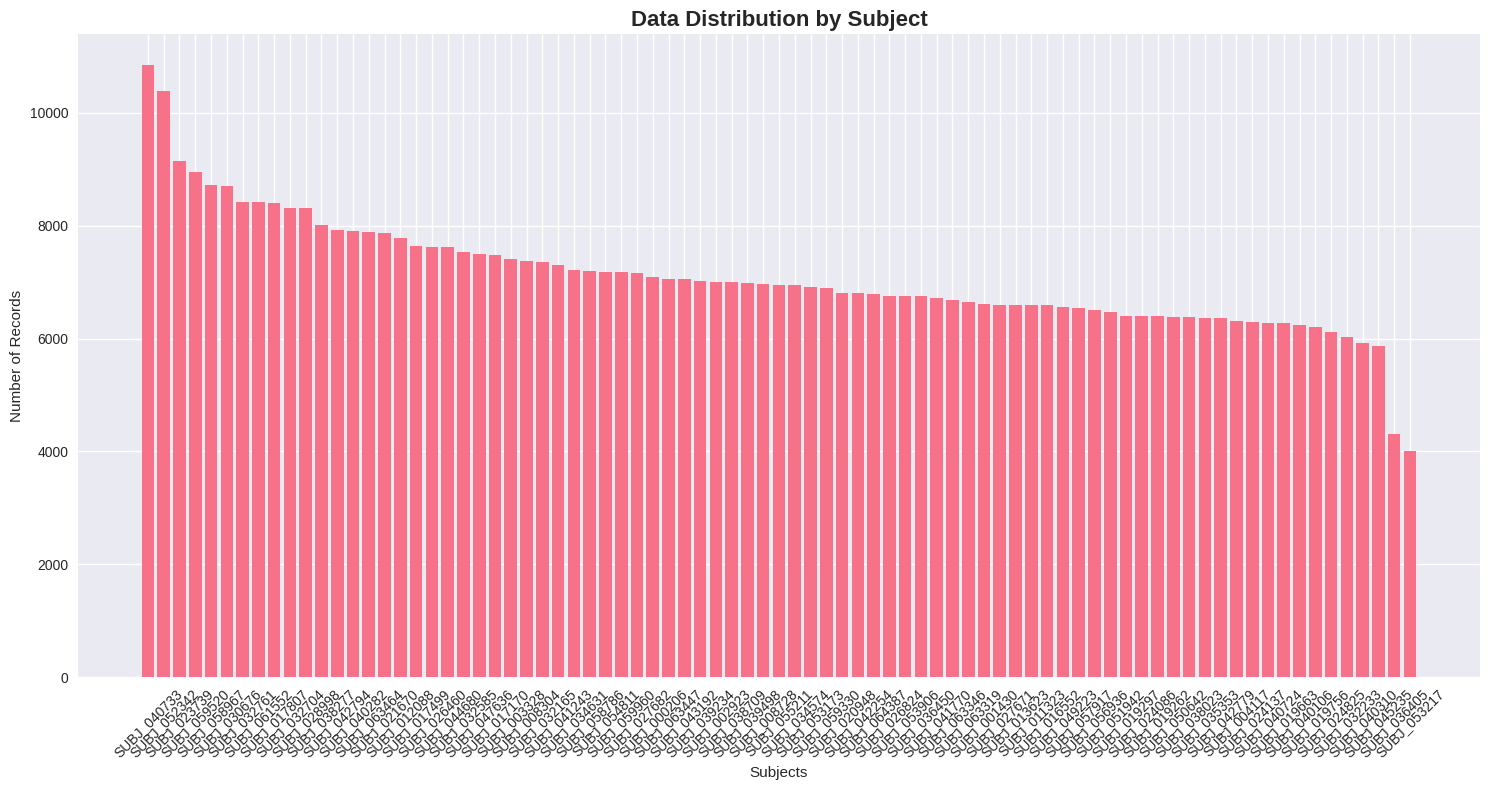

In [22]:
# 10. SUBJECT ANALYSIS
print("\n=== SUBJECT ANALYSIS ===")

if 'subject' in df_train.columns:
    subject_counts = df_train['subject'].value_counts()
    print(subject_counts)
    
    plt.figure(figsize=(15, 8))
    plt.bar(range(len(subject_counts)), subject_counts.values)
    plt.title('Data Distribution by Subject', fontsize=16, fontweight='bold')
    plt.xlabel('Subjects')
    plt.ylabel('Number of Records')
    plt.xticks(range(len(subject_counts)), subject_counts.index, rotation=45)
    plt.tight_layout()
    plt.show()

In [35]:
df_SUBJ_023739 = df_train[df_train['subject'] == 'SUBJ_023739']
print(df_SUBJ_023739.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9154 entries, 29862 to 573480
Columns: 341 entries, row_id to tof_5_v63
dtypes: float64(332), int64(1), object(8)
memory usage: 23.9+ MB
None


In [42]:
df_SUBJ_023739['sequence_type'].value_counts()


sequence_type
Target        5579
Non-Target    3575
Name: count, dtype: int64

In [44]:


df_SUBJ_023739_target = df_SUBJ_023739[df_SUBJ_023739['sequence_type'] == 'Target']
df_SUBJ_023739_non_target = df_SUBJ_023739[df_SUBJ_023739['sequence_type'] == 'Non-Target']

print(df_SUBJ_023739_target.head())
print(df_SUBJ_023739_non_target.head())




                  row_id sequence_type sequence_id  sequence_counter  \
29862  SEQ_003334_000000        Target  SEQ_003334                 0   
29863  SEQ_003334_000001        Target  SEQ_003334                 1   
29864  SEQ_003334_000002        Target  SEQ_003334                 2   
29865  SEQ_003334_000003        Target  SEQ_003334                 3   
29866  SEQ_003334_000004        Target  SEQ_003334                 4   

           subject      orientation                       behavior  \
29862  SUBJ_023739  Seated Straight  Moves hand to target location   
29863  SUBJ_023739  Seated Straight  Moves hand to target location   
29864  SUBJ_023739  Seated Straight  Moves hand to target location   
29865  SUBJ_023739  Seated Straight  Moves hand to target location   
29866  SUBJ_023739  Seated Straight  Moves hand to target location   

            phase            gesture     acc_x  ...  tof_5_v54  tof_5_v55  \
29862  Transition  Neck - pinch skin  5.035156  ...       -1.0       

<Axes: xlabel='sequence_id'>

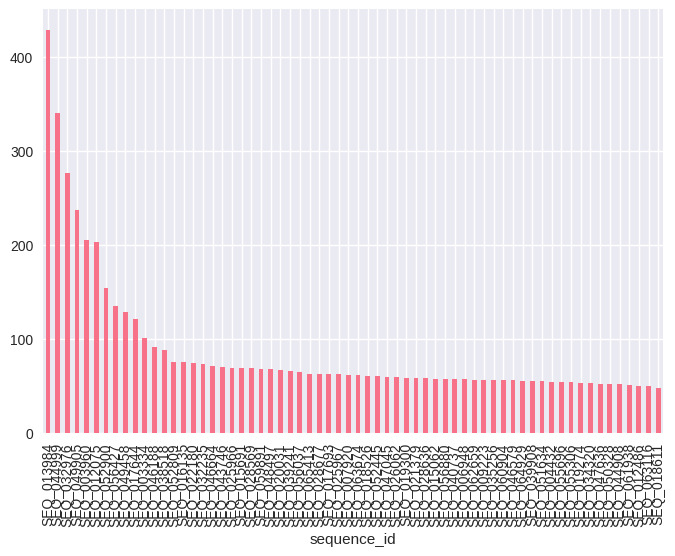

In [47]:
df_SUBJ_023739_target['sequence_id'].value_counts().plot(kind='bar')

sequence_id
SEQ_013984    429
SEQ_044999    340
SEQ_032976    277
SEQ_049905    237
SEQ_003960    205
             ... 
SEQ_044908     52
SEQ_061938     51
SEQ_012486     50
SEQ_063116     50
SEQ_018611     48
Name: count, Length: 64, dtype: int64


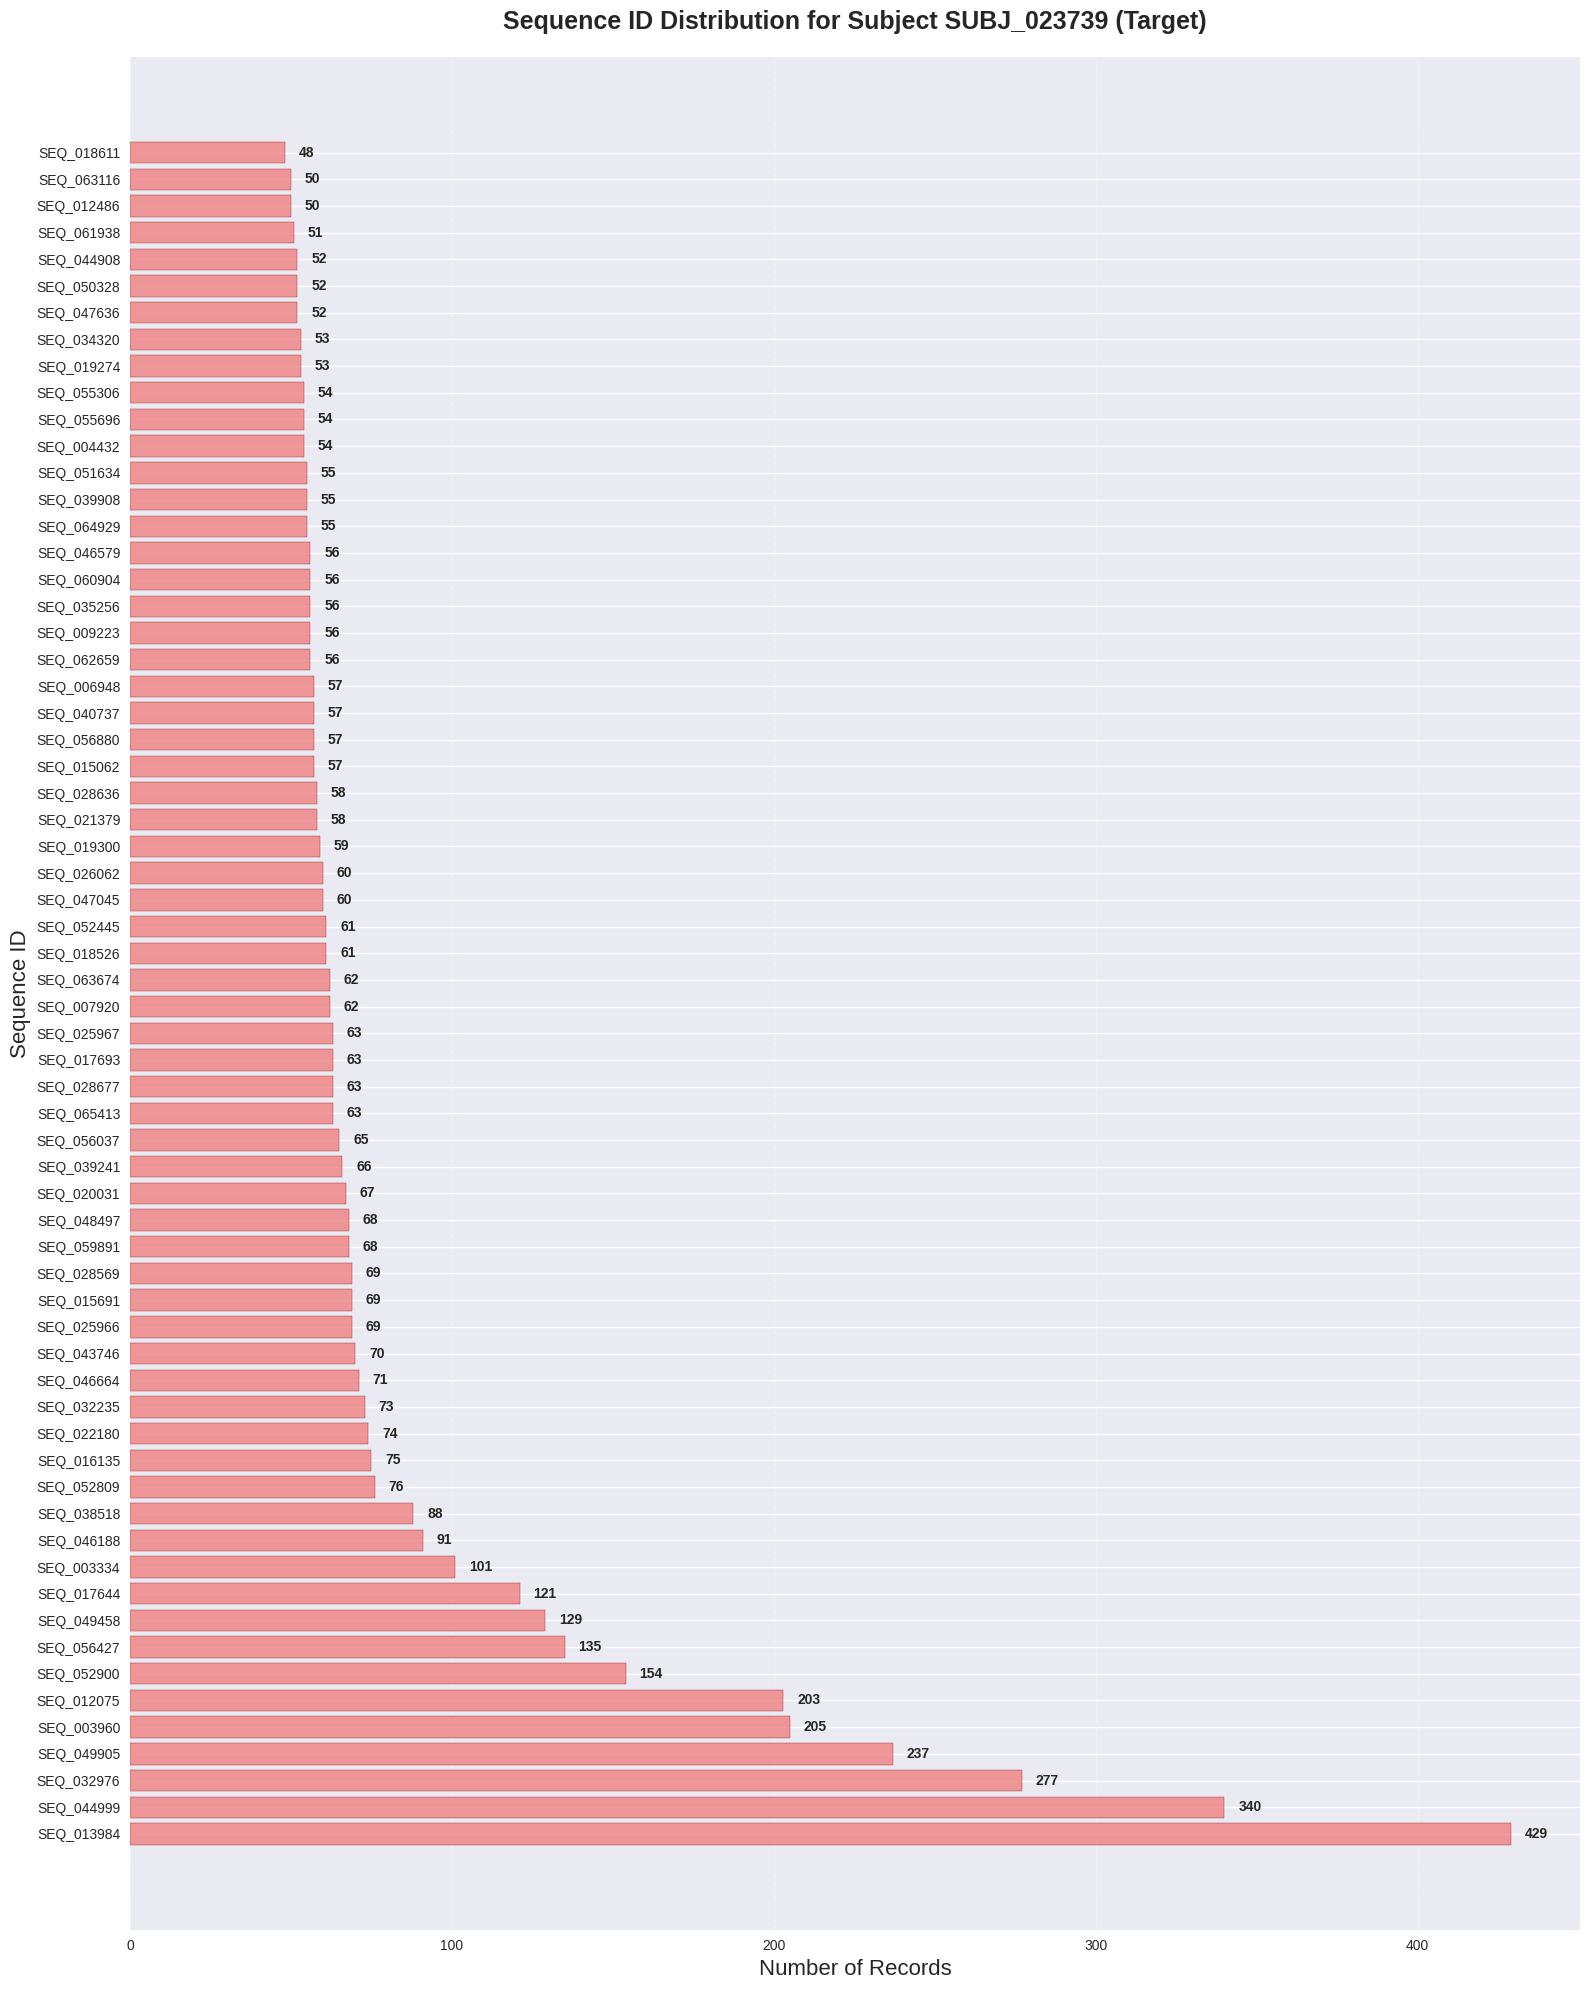

In [49]:
# Horizontal bar plot - great when you have many sequence IDs
plt.figure(figsize=(16, 20))  # Taller for horizontal bars

# Create horizontal bar plot
sequence_counts = df_SUBJ_023739_target['sequence_id'].value_counts()
print(sequence_counts)
bars = plt.barh(range(len(sequence_counts)), sequence_counts.values, 
                color='lightcoral', edgecolor='darkred', alpha=0.8)

# Customize the plot
plt.title('Sequence ID Distribution for Subject SUBJ_023739 (Target)', 
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of Records', fontsize=16)
plt.ylabel('Sequence ID', fontsize=16)
plt.yticks(range(len(sequence_counts)), sequence_counts.index)

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + max(sequence_counts.values)*0.01, bar.get_y() + bar.get_height()/2,
             f'{int(width):,}', ha='left', va='center', fontsize=10, fontweight='bold')

plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

In [57]:
df_SUBJ_023739_target[df_SUBJ_023739_target['sequence_id'] == 'SEQ_013984']['gesture'].value_counts()

gesture
Neck - scratch    429
Name: count, dtype: int64

sequence_id
SEQ_003334    1
SEQ_003960    1
SEQ_004432    1
SEQ_006948    1
SEQ_007920    1
             ..
SEQ_062659    1
SEQ_063116    1
SEQ_063674    1
SEQ_064929    1
SEQ_065413    1
Name: gesture, Length: 64, dtype: int64


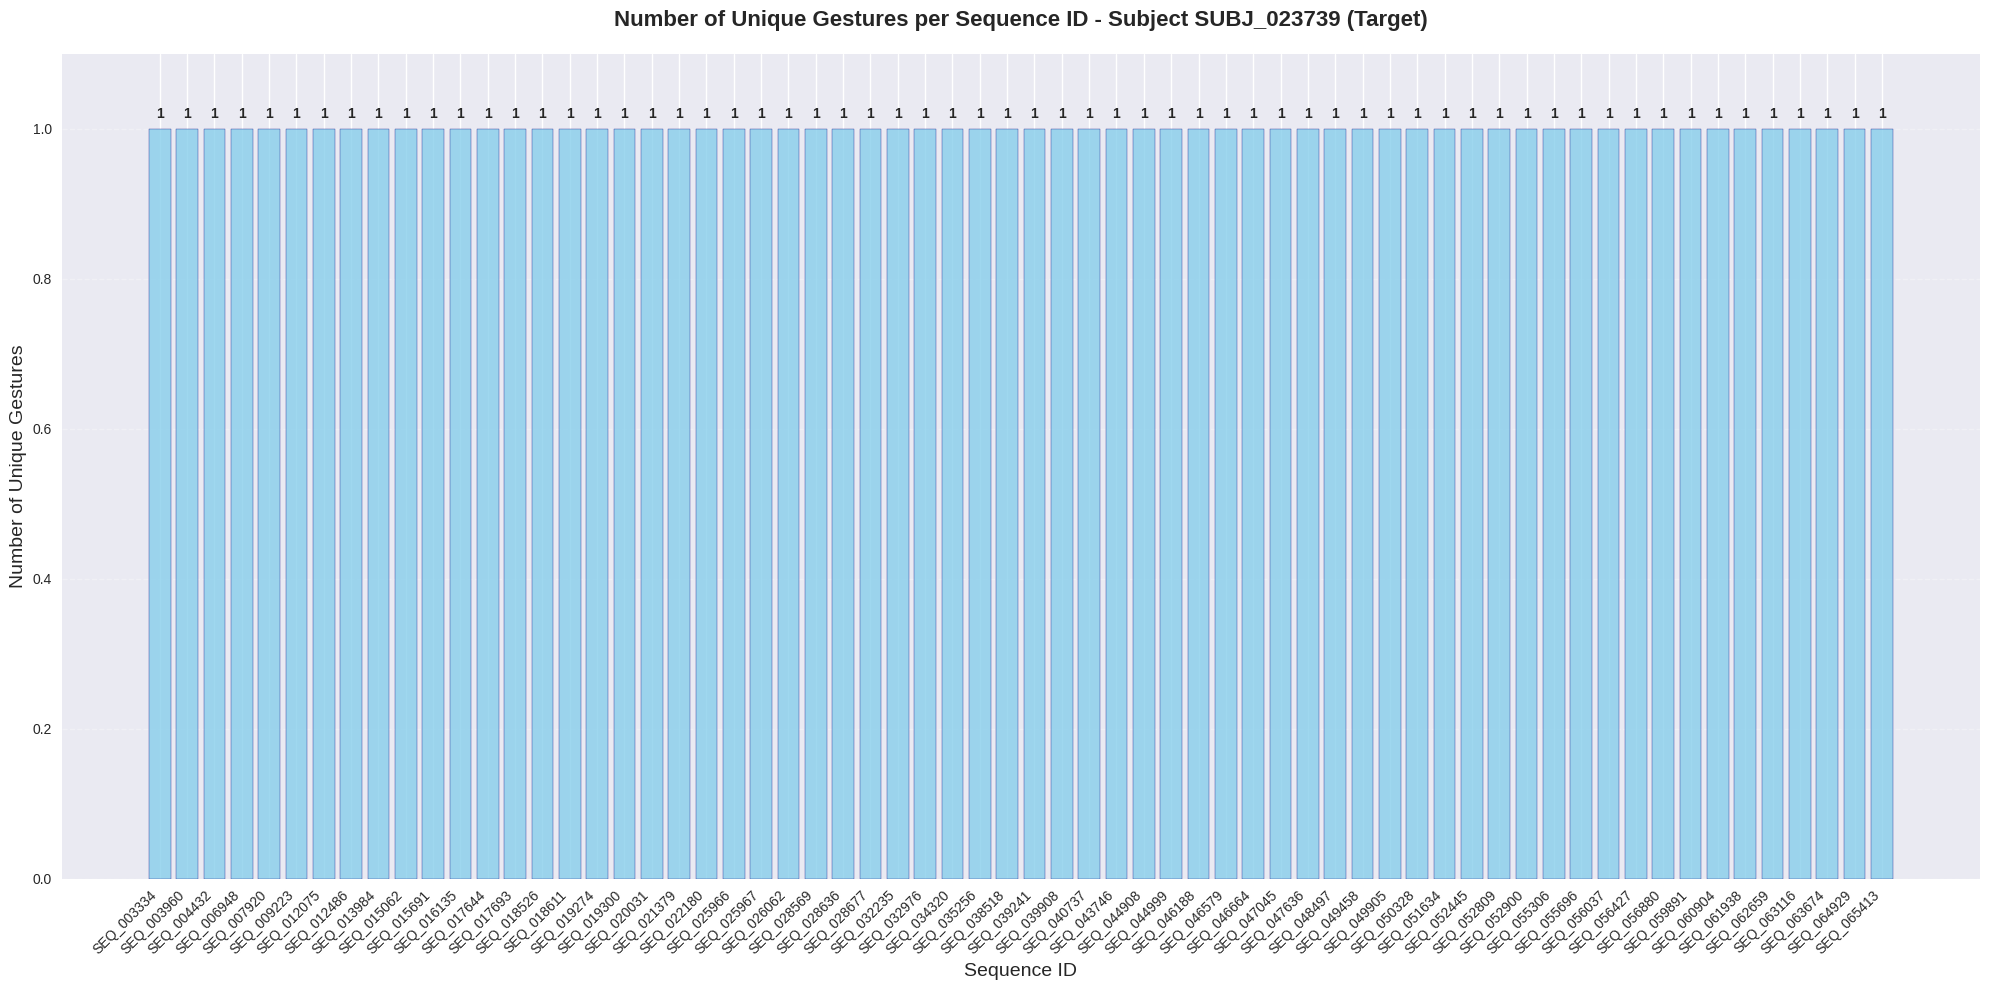

=== GESTURE DIVERSITY SUMMARY ===
Total sequences: 64
Average unique gestures per sequence: 1.00
Maximum unique gestures in a sequence: 1
Minimum unique gestures in a sequence: 1
Sequences with only 1 gesture: 64
Sequences with multiple gestures: 0

=== TOP 10 SEQUENCES WITH MOST GESTURE VARIETY ===
sequence_id
SEQ_003334    1
SEQ_003960    1
SEQ_004432    1
SEQ_006948    1
SEQ_007920    1
SEQ_009223    1
SEQ_012075    1
SEQ_012486    1
SEQ_013984    1
SEQ_015062    1
Name: gesture, dtype: int64


In [60]:
# Number of unique gestures per sequence ID - Bar Graph
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size for better visualization
plt.figure(figsize=(20, 10))

# Calculate unique gestures per sequence ID
gesture_counts = df_SUBJ_023739_target.groupby('sequence_id')['gesture'].nunique().sort_values(ascending=False)
print(gesture_counts)
# Create the bar plot
bars = plt.bar(range(len(gesture_counts)), gesture_counts.values, 
               color='skyblue', edgecolor='navy', alpha=0.8)

# Customize the plot
plt.title('Number of Unique Gestures per Sequence ID - Subject SUBJ_023739 (Target)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Sequence ID', fontsize=14)
plt.ylabel('Number of Unique Gestures', fontsize=14)
plt.xticks(range(len(gesture_counts)), gesture_counts.index, rotation=45, ha='right')

# Add value labels on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add grid and styling
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.ylim(0, max(gesture_counts.values) * 1.1)  # Add 10% padding to y-axis

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# Print summary statistics
print("=== GESTURE DIVERSITY SUMMARY ===")
print(f"Total sequences: {len(gesture_counts)}")
print(f"Average unique gestures per sequence: {gesture_counts.mean():.2f}")
print(f"Maximum unique gestures in a sequence: {gesture_counts.max()}")
print(f"Minimum unique gestures in a sequence: {gesture_counts.min()}")
print(f"Sequences with only 1 gesture: {(gesture_counts == 1).sum()}")
print(f"Sequences with multiple gestures: {(gesture_counts > 1).sum()}")

# Show top 10 sequences with most gesture variety
print("\n=== TOP 10 SEQUENCES WITH MOST GESTURE VARIETY ===")
print(gesture_counts.head(10))

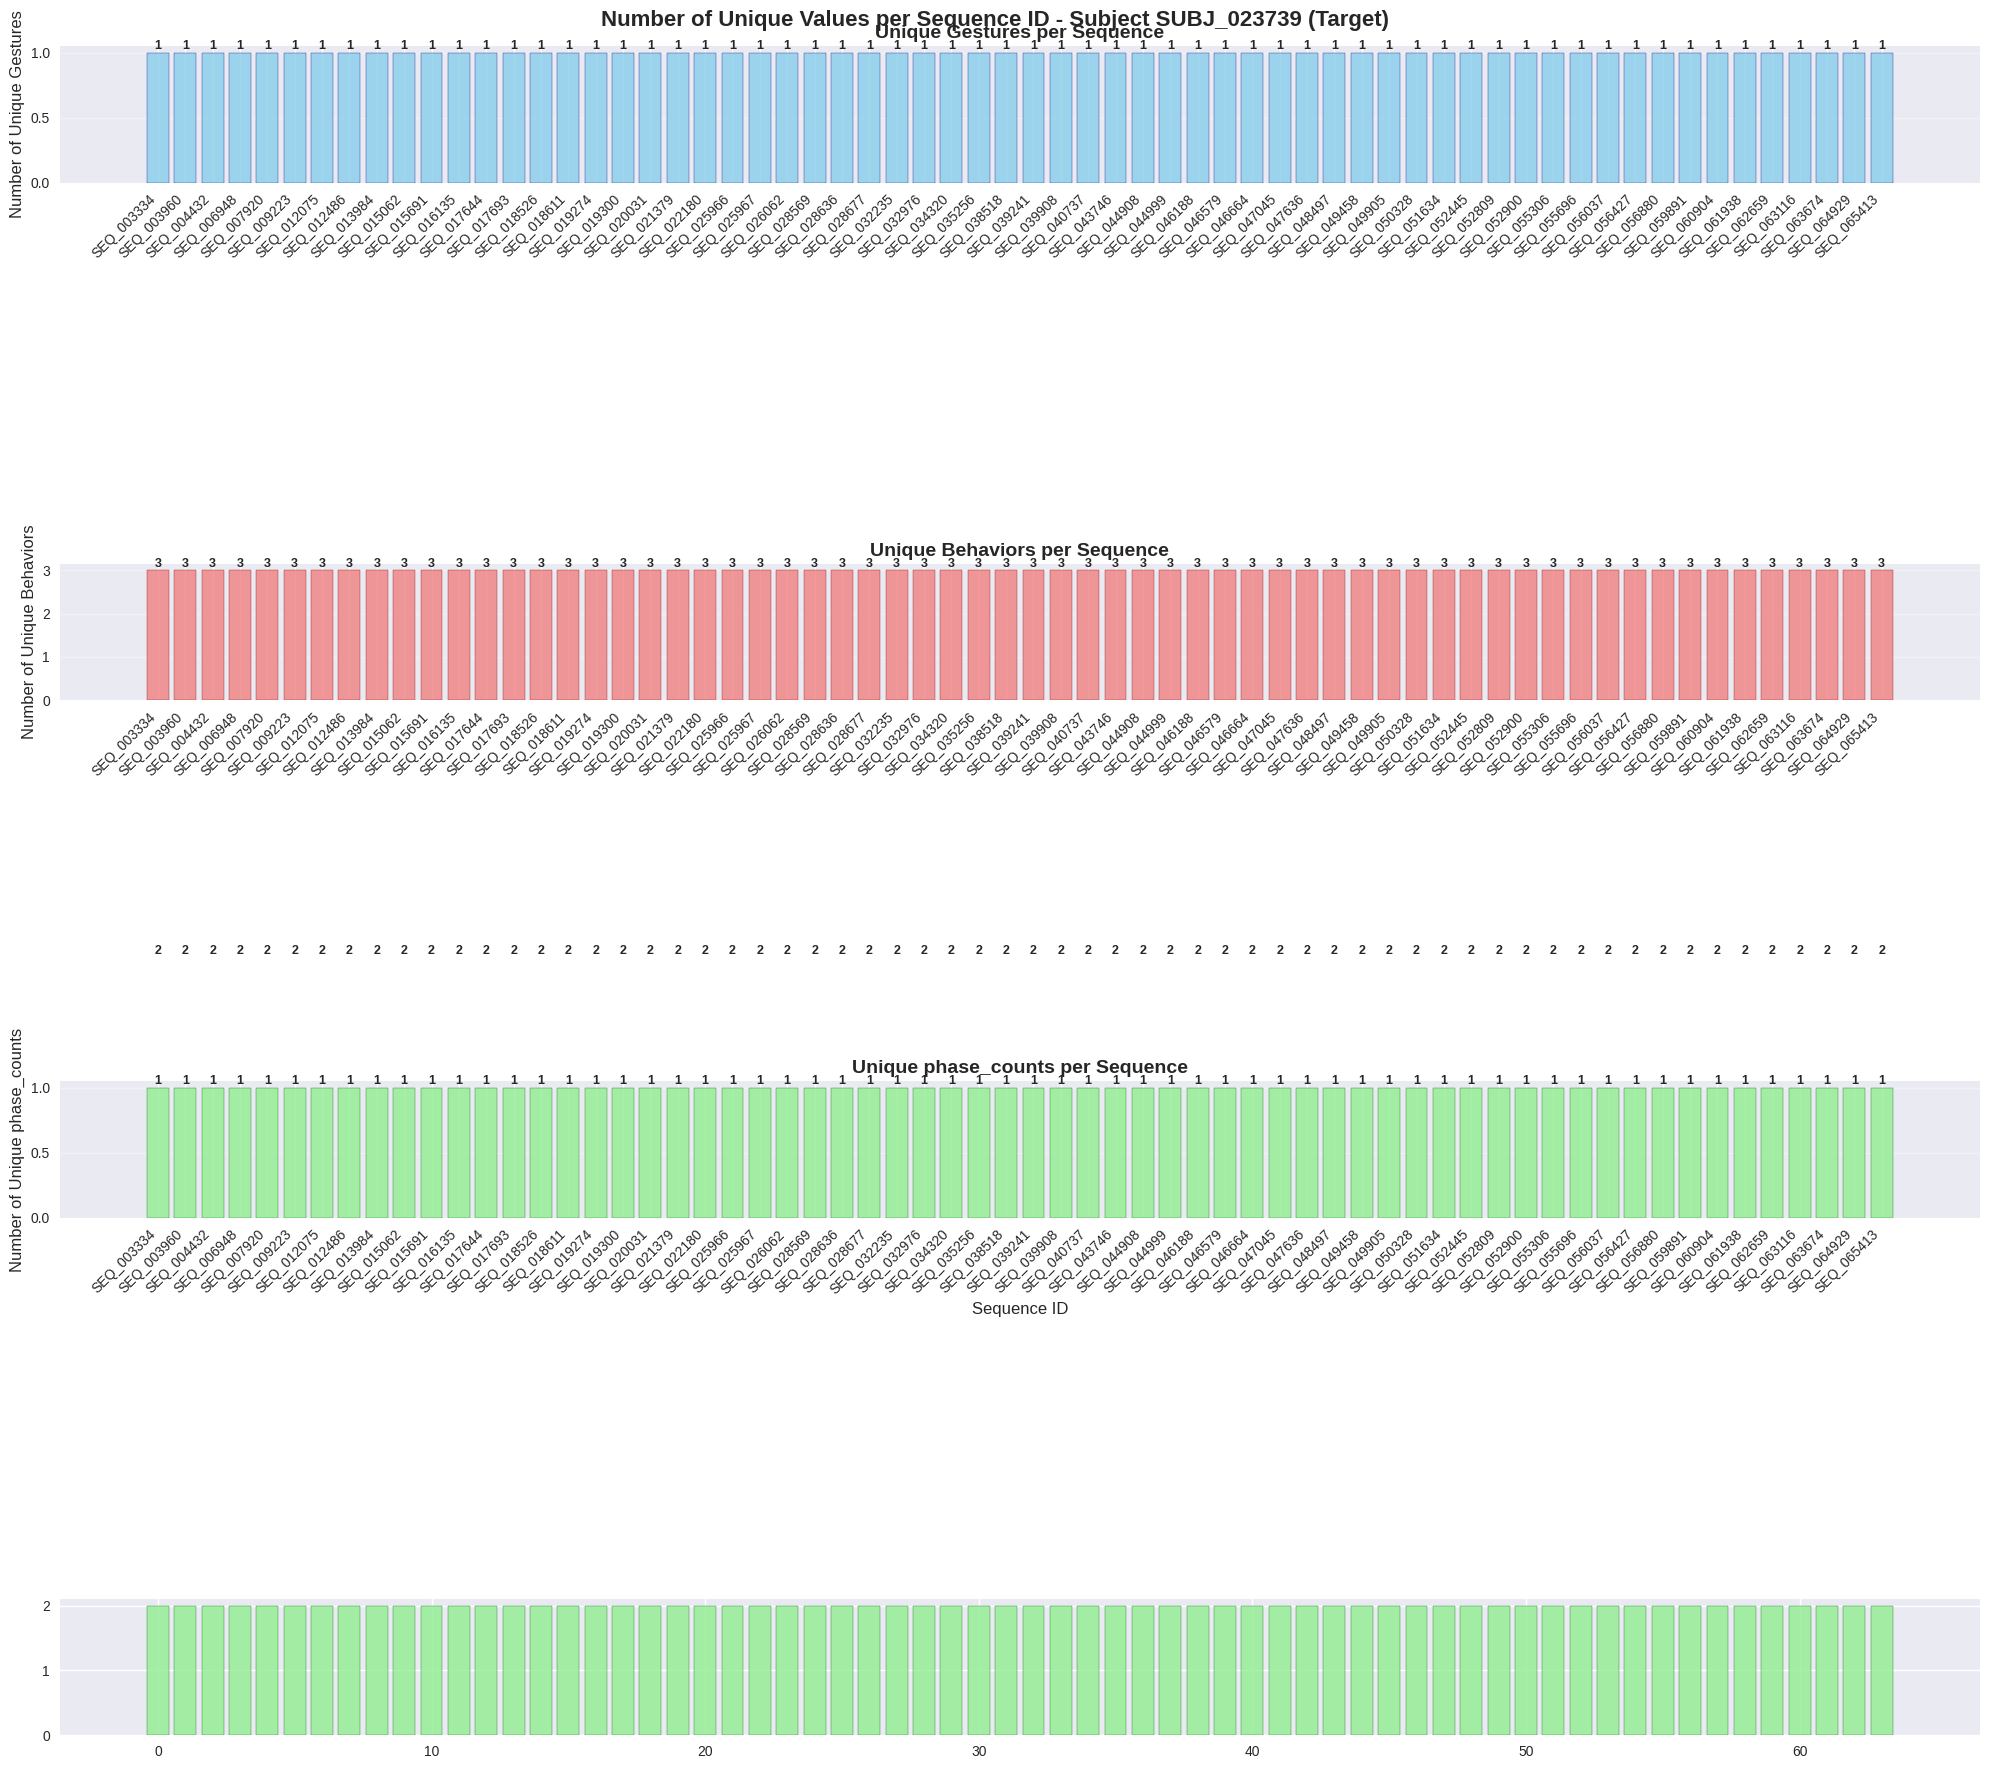

=== SUMMARY STATISTICS ===
Total sequences: 64

--- GESTURES ---
Average unique gestures per sequence: 1.00
Max unique gestures: 1
Min unique gestures: 1
Sequences with only 1 gesture: 64

--- BEHAVIORS ---
Average unique behaviors per sequence: 3.00
Max unique behaviors: 3
Min unique behaviors: 3
Sequences with only 1 behavior: 0

--- ORIENTATIONS ---
Average unique orientations per sequence: 1.00
Max unique orientations: 1
Min unique orientations: 1
Sequences with only 1 orientation: 64

=== TOP 5 SEQUENCES WITH MOST VARIETY ===

Top 5 - Most Unique Gestures:
sequence_id
SEQ_003334    1
SEQ_003960    1
SEQ_004432    1
SEQ_006948    1
SEQ_007920    1
Name: gesture, dtype: int64

Top 5 - Most Unique Behaviors:
sequence_id
SEQ_003334    3
SEQ_003960    3
SEQ_004432    3
SEQ_006948    3
SEQ_007920    3
Name: behavior, dtype: int64

Top 5 - Most Unique Orientations:
sequence_id
SEQ_003334    1
SEQ_003960    1
SEQ_004432    1
SEQ_006948    1
SEQ_007920    1
Name: orientation, dtype: int64


In [73]:
# Calculate unique counts for all three categories
gesture_counts = df_SUBJ_023739_target.groupby('sequence_id')['gesture'].nunique().sort_values(ascending=False)
behavior_counts = df_SUBJ_023739_target.groupby('sequence_id')['behavior'].nunique().sort_values(ascending=False)
orientation_counts = df_SUBJ_023739_target.groupby('sequence_id')['orientation'].nunique().sort_values(ascending=False)
phase_counts = df_SUBJ_023739_target.groupby('sequence_id')['phase'].nunique().sort_values(ascending=False)


# Create subplots for all three
fig, axes = plt.subplots(4, 1, figsize=(20, 18))
fig.suptitle('Number of Unique Values per Sequence ID - Subject SUBJ_023739 (Target)', 
             fontsize=16, fontweight='bold')

# 1. Gestures
bars1 = axes[0].bar(range(len(gesture_counts)), gesture_counts.values, 
                    color='skyblue', edgecolor='navy', alpha=0.8)
axes[0].set_title('Unique Gestures per Sequence', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Number of Unique Gestures', fontsize=12)
axes[0].set_xticks(range(len(gesture_counts)))
axes[0].set_xticklabels(gesture_counts.index, rotation=45, ha='right')
axes[0].grid(axis='y', alpha=0.3)

# Add value labels for gestures
for i, bar in enumerate(bars1):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                 f'{int(height)}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# 2. Behaviors
bars2 = axes[1].bar(range(len(behavior_counts)), behavior_counts.values, 
                    color='lightcoral', edgecolor='darkred', alpha=0.8)
axes[1].set_title('Unique Behaviors per Sequence', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Number of Unique Behaviors', fontsize=12)
axes[1].set_xticks(range(len(behavior_counts)))
axes[1].set_xticklabels(behavior_counts.index, rotation=45, ha='right')
axes[1].grid(axis='y', alpha=0.3)

# Add value labels for behaviors
for i, bar in enumerate(bars2):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                 f'{int(height)}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# 3. Orientations
bars3 = axes[2].bar(range(len(orientation_counts)), orientation_counts.values, 
                    color='lightgreen', edgecolor='darkgreen', alpha=0.8)
axes[2].set_title('Unique Orientations per Sequence', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Number of Unique Orientations', fontsize=12)
axes[2].set_xlabel('Sequence ID', fontsize=12)
axes[2].set_xticks(range(len(orientation_counts)))
axes[2].set_xticklabels(orientation_counts.index, rotation=45, ha='right')
axes[2].grid(axis='y', alpha=0.3)

# Add value labels for orientations
for i, bar in enumerate(bars3):
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                 f'{int(height)}', ha='center', va='bottom', fontsize=9, fontweight='bold')


# 3. Phase
bars3 = axes[3].bar(range(len(phase_counts)), phase_counts.values, 
                    color='lightgreen', edgecolor='darkgreen', alpha=0.8)
axes[2].set_title('Unique phase_counts per Sequence', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Number of Unique phase_counts', fontsize=12)
axes[2].set_xlabel('Sequence ID', fontsize=12)
axes[2].set_xticks(range(len(phase_counts)))
axes[2].set_xticklabels(phase_counts.index, rotation=45, ha='right')
axes[2].grid(axis='y', alpha=0.3)

# Add value labels for orientations
for i, bar in enumerate(bars3):
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                 f'{int(height)}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary statistics for all three
print("=== SUMMARY STATISTICS ===")
print(f"Total sequences: {len(gesture_counts)}")
print("\n--- GESTURES ---")
print(f"Average unique gestures per sequence: {gesture_counts.mean():.2f}")
print(f"Max unique gestures: {gesture_counts.max()}")
print(f"Min unique gestures: {gesture_counts.min()}")
print(f"Sequences with only 1 gesture: {(gesture_counts == 1).sum()}")

print("\n--- BEHAVIORS ---")
print(f"Average unique behaviors per sequence: {behavior_counts.mean():.2f}")
print(f"Max unique behaviors: {behavior_counts.max()}")
print(f"Min unique behaviors: {behavior_counts.min()}")
print(f"Sequences with only 1 behavior: {(behavior_counts == 1).sum()}")

print("\n--- ORIENTATIONS ---")
print(f"Average unique orientations per sequence: {orientation_counts.mean():.2f}")
print(f"Max unique orientations: {orientation_counts.max()}")
print(f"Min unique orientations: {orientation_counts.min()}")
print(f"Sequences with only 1 orientation: {(orientation_counts == 1).sum()}")

# Show top 5 sequences for each category
print("\n=== TOP 5 SEQUENCES WITH MOST VARIETY ===")
print("\nTop 5 - Most Unique Gestures:")
print(gesture_counts.head())

print("\nTop 5 - Most Unique Behaviors:")
print(behavior_counts.head())

print("\nTop 5 - Most Unique Orientations:")
print(orientation_counts.head())

In [69]:
df_SUBJ_023739_target[df_SUBJ_023739_target['sequence_id'] == 'SEQ_013984']['phase'].value_counts()

phase
Transition    401
Gesture        28
Name: count, dtype: int64

In [70]:
# Get phase value counts for all sequences
all_phase_counts = {}

for seq_id in df_SUBJ_023739_target['sequence_id'].unique():
    seq_data = df_SUBJ_023739_target[df_SUBJ_023739_target['sequence_id'] == seq_id]
    phase_counts = seq_data['phase'].value_counts()
    all_phase_counts[seq_id] = phase_counts

# Convert to DataFrame for better visualization
phase_df = pd.DataFrame(all_phase_counts).T
phase_df = phase_df.fillna(0)  # Fill NaN with 0 for sequences that don't have certain phases

print("=== PHASE COUNTS FOR ALL SEQUENCES ===")
print(phase_df)

# Summary statistics
print("\n=== SUMMARY STATISTICS ===")
print(f"Total sequences: {len(phase_df)}")
print(f"Total phases found: {len(phase_df.columns)}")
print(f"Phases present: {list(phase_df.columns)}")
print(f"\nAverage counts per phase:")
for phase in phase_df.columns:
    print(f"  {phase}: {phase_df[phase].mean():.2f}")

=== PHASE COUNTS FOR ALL SEQUENCES ===
phase       Gesture  Transition
SEQ_003334       30          71
SEQ_003960       30         175
SEQ_004432       29          25
SEQ_006948       31          26
SEQ_007920       33          29
...             ...         ...
SEQ_062659       29          27
SEQ_063116       28          22
SEQ_063674       31          31
SEQ_064929       26          29
SEQ_065413       29          34

[64 rows x 2 columns]

=== SUMMARY STATISTICS ===
Total sequences: 64
Total phases found: 2
Phases present: ['Gesture', 'Transition']

Average counts per phase:
  Gesture: 30.30
  Transition: 56.88


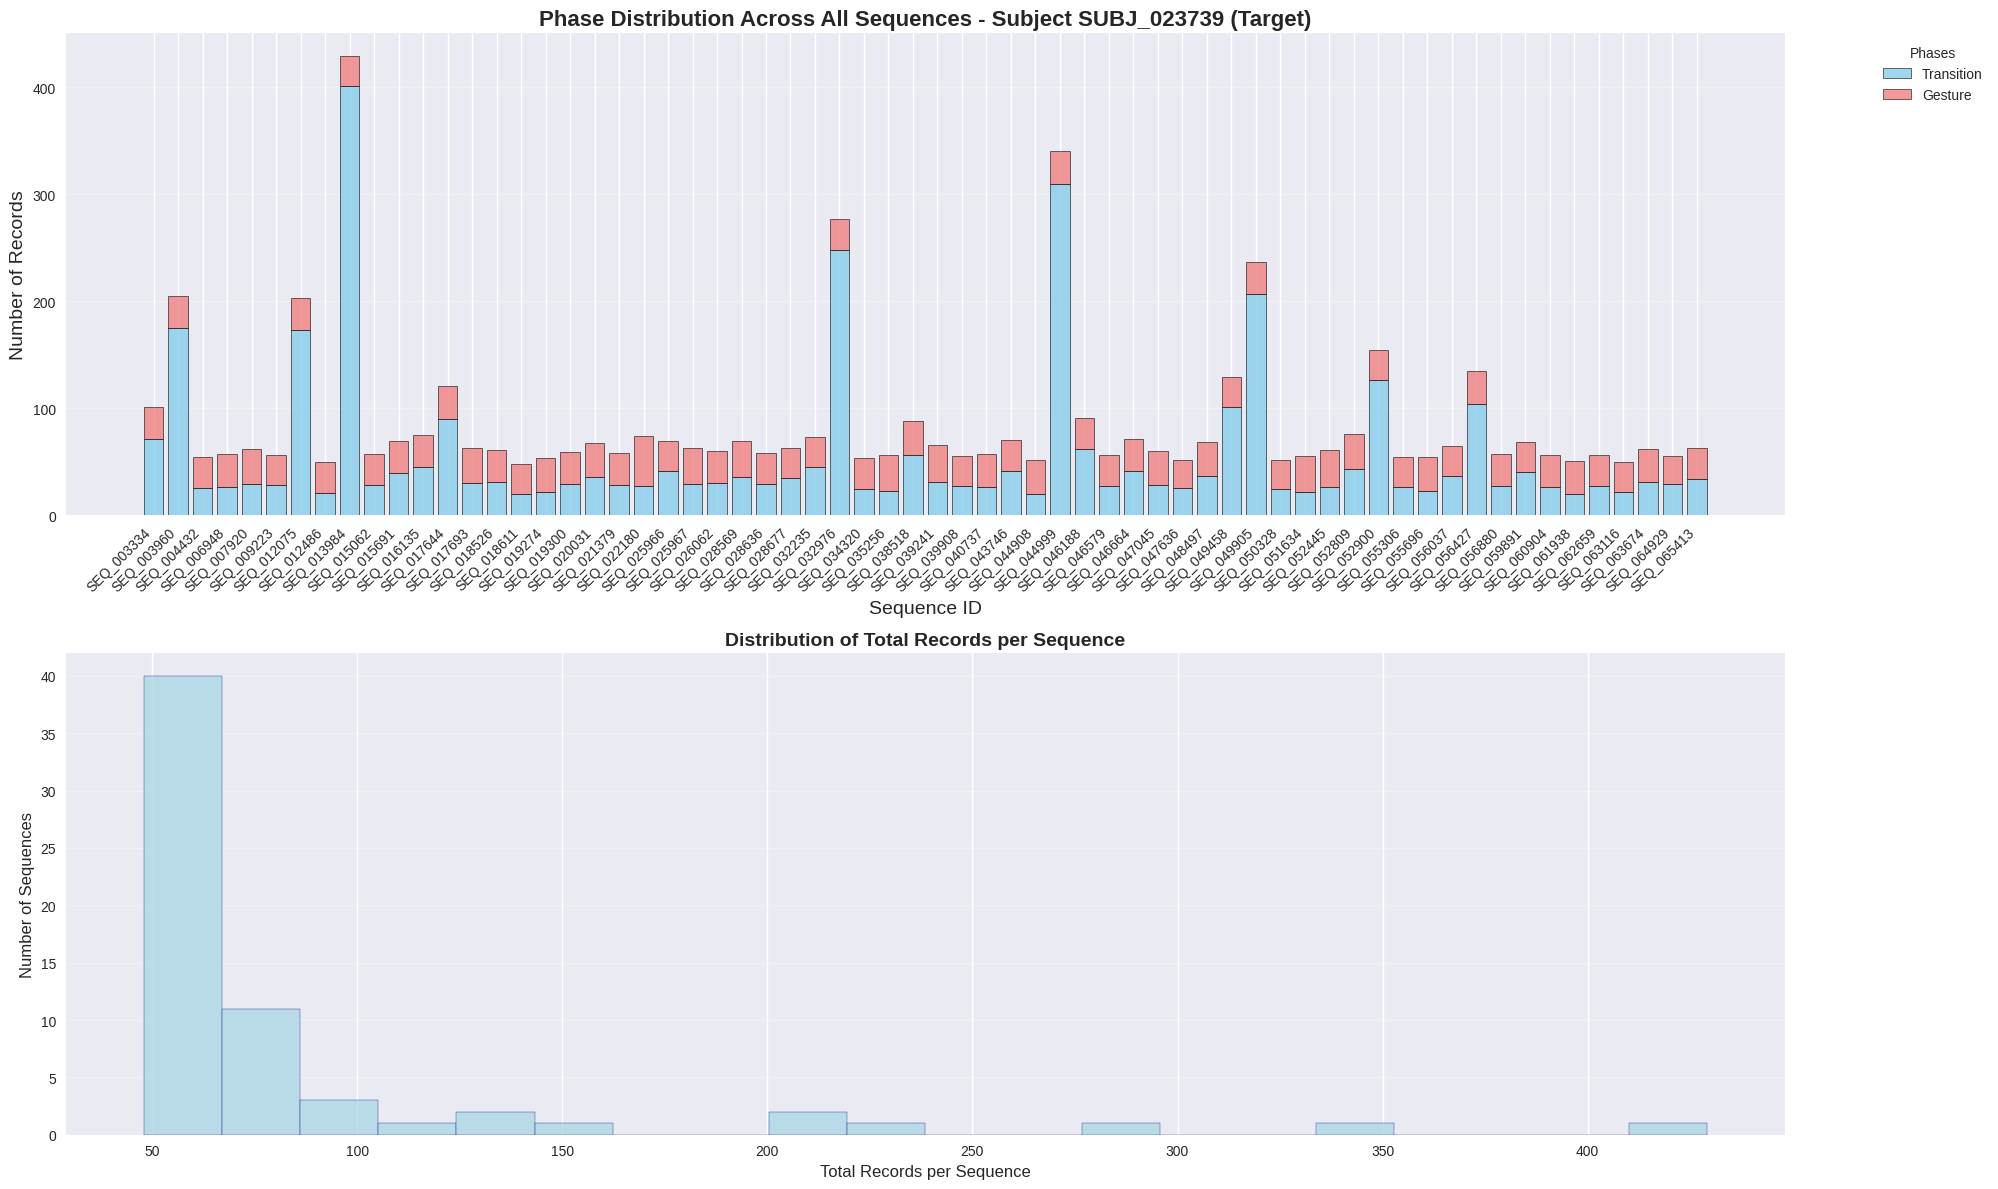

=== PHASE DISTRIBUTION SUMMARY ===
Total sequences: 64
Total phases found: 2
Phases: ['Transition', 'Gesture']

Average records per phase:
  Transition: 56.88 records per sequence
  Gesture: 30.30 records per sequence

Average total records per sequence: 87.17


In [71]:
# Create a stacked histogram showing phase distribution
import matplotlib.pyplot as plt
import numpy as np

# Get the data for plotting
phase_counts_per_sequence = []
for seq_id in df_SUBJ_023739_target['sequence_id'].unique():
    seq_data = df_SUBJ_023739_target[df_SUBJ_023739_target['sequence_id'] == seq_id]
    phase_counts = seq_data['phase'].value_counts()
    phase_counts_per_sequence.append(phase_counts)

# Convert to DataFrame
phase_df = pd.DataFrame(phase_counts_per_sequence)
phase_df = phase_df.fillna(0)

# Get unique phases
phases = phase_df.columns.tolist()
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum', 'orange', 'pink', 'cyan']

# Create the stacked histogram
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12))

# Plot 1: Stacked bar chart showing phase counts for each sequence
sequence_ids = df_SUBJ_023739_target['sequence_id'].unique()
x_pos = np.arange(len(sequence_ids))

# Create stacked bars
bottom = np.zeros(len(sequence_ids))
for i, phase in enumerate(phases):
    if phase in phase_df.columns:
        values = phase_df[phase].values
        ax1.bar(x_pos, values, bottom=bottom, label=phase, 
                color=colors[i % len(colors)], alpha=0.8, edgecolor='black', linewidth=0.5)
        bottom += values

ax1.set_title('Phase Distribution Across All Sequences - Subject SUBJ_023739 (Target)', 
              fontsize=16, fontweight='bold')
ax1.set_xlabel('Sequence ID', fontsize=14)
ax1.set_ylabel('Number of Records', fontsize=14)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(sequence_ids, rotation=45, ha='right')
ax1.legend(title='Phases', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Histogram showing distribution of total records per sequence
total_records_per_sequence = phase_df.sum(axis=1)
ax2.hist(total_records_per_sequence, bins=20, color='lightblue', edgecolor='navy', alpha=0.8)
ax2.set_title('Distribution of Total Records per Sequence', fontsize=14, fontweight='bold')
ax2.set_xlabel('Total Records per Sequence', fontsize=12)
ax2.set_ylabel('Number of Sequences', fontsize=12)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary
print("=== PHASE DISTRIBUTION SUMMARY ===")
print(f"Total sequences: {len(sequence_ids)}")
print(f"Total phases found: {len(phases)}")
print(f"Phases: {phases}")

print("\nAverage records per phase:")
for phase in phases:
    if phase in phase_df.columns:
        avg_count = phase_df[phase].mean()
        print(f"  {phase}: {avg_count:.2f} records per sequence")

print(f"\nAverage total records per sequence: {total_records_per_sequence.mean():.2f}")


=== Processing PHASE ===
Found 2 unique phase categories:
  Transition: 3640 total records
  Gesture: 1939 total records

=== Processing GESTURE ===
Found 8 unique gesture categories:
  Neck - scratch: 1299.0 total records
  Eyebrow - pull hair: 876.0 total records
  Cheek - pinch skin: 802.0 total records
  Forehead - pull hairline: 591.0 total records
  Eyelash - pull hair: 532.0 total records
  Neck - pinch skin: 504.0 total records
  Forehead - scratch: 490.0 total records
  Above ear - pull hair: 485.0 total records

=== Processing ORIENTATION ===
Found 4 unique orientation categories:
  Seated Straight: 1435.0 total records
  Lie on Side - Non Dominant: 1395.0 total records
  Seated Lean Non Dom - FACE DOWN: 1382.0 total records
  Lie on Back: 1367.0 total records

=== Processing BEHAVIOR ===
Found 4 unique behavior categories:
  Moves hand to target location: 2481.0 total records
  Performs gesture: 1939 total records
  Hand at target location: 597 total records
  Relaxes and m

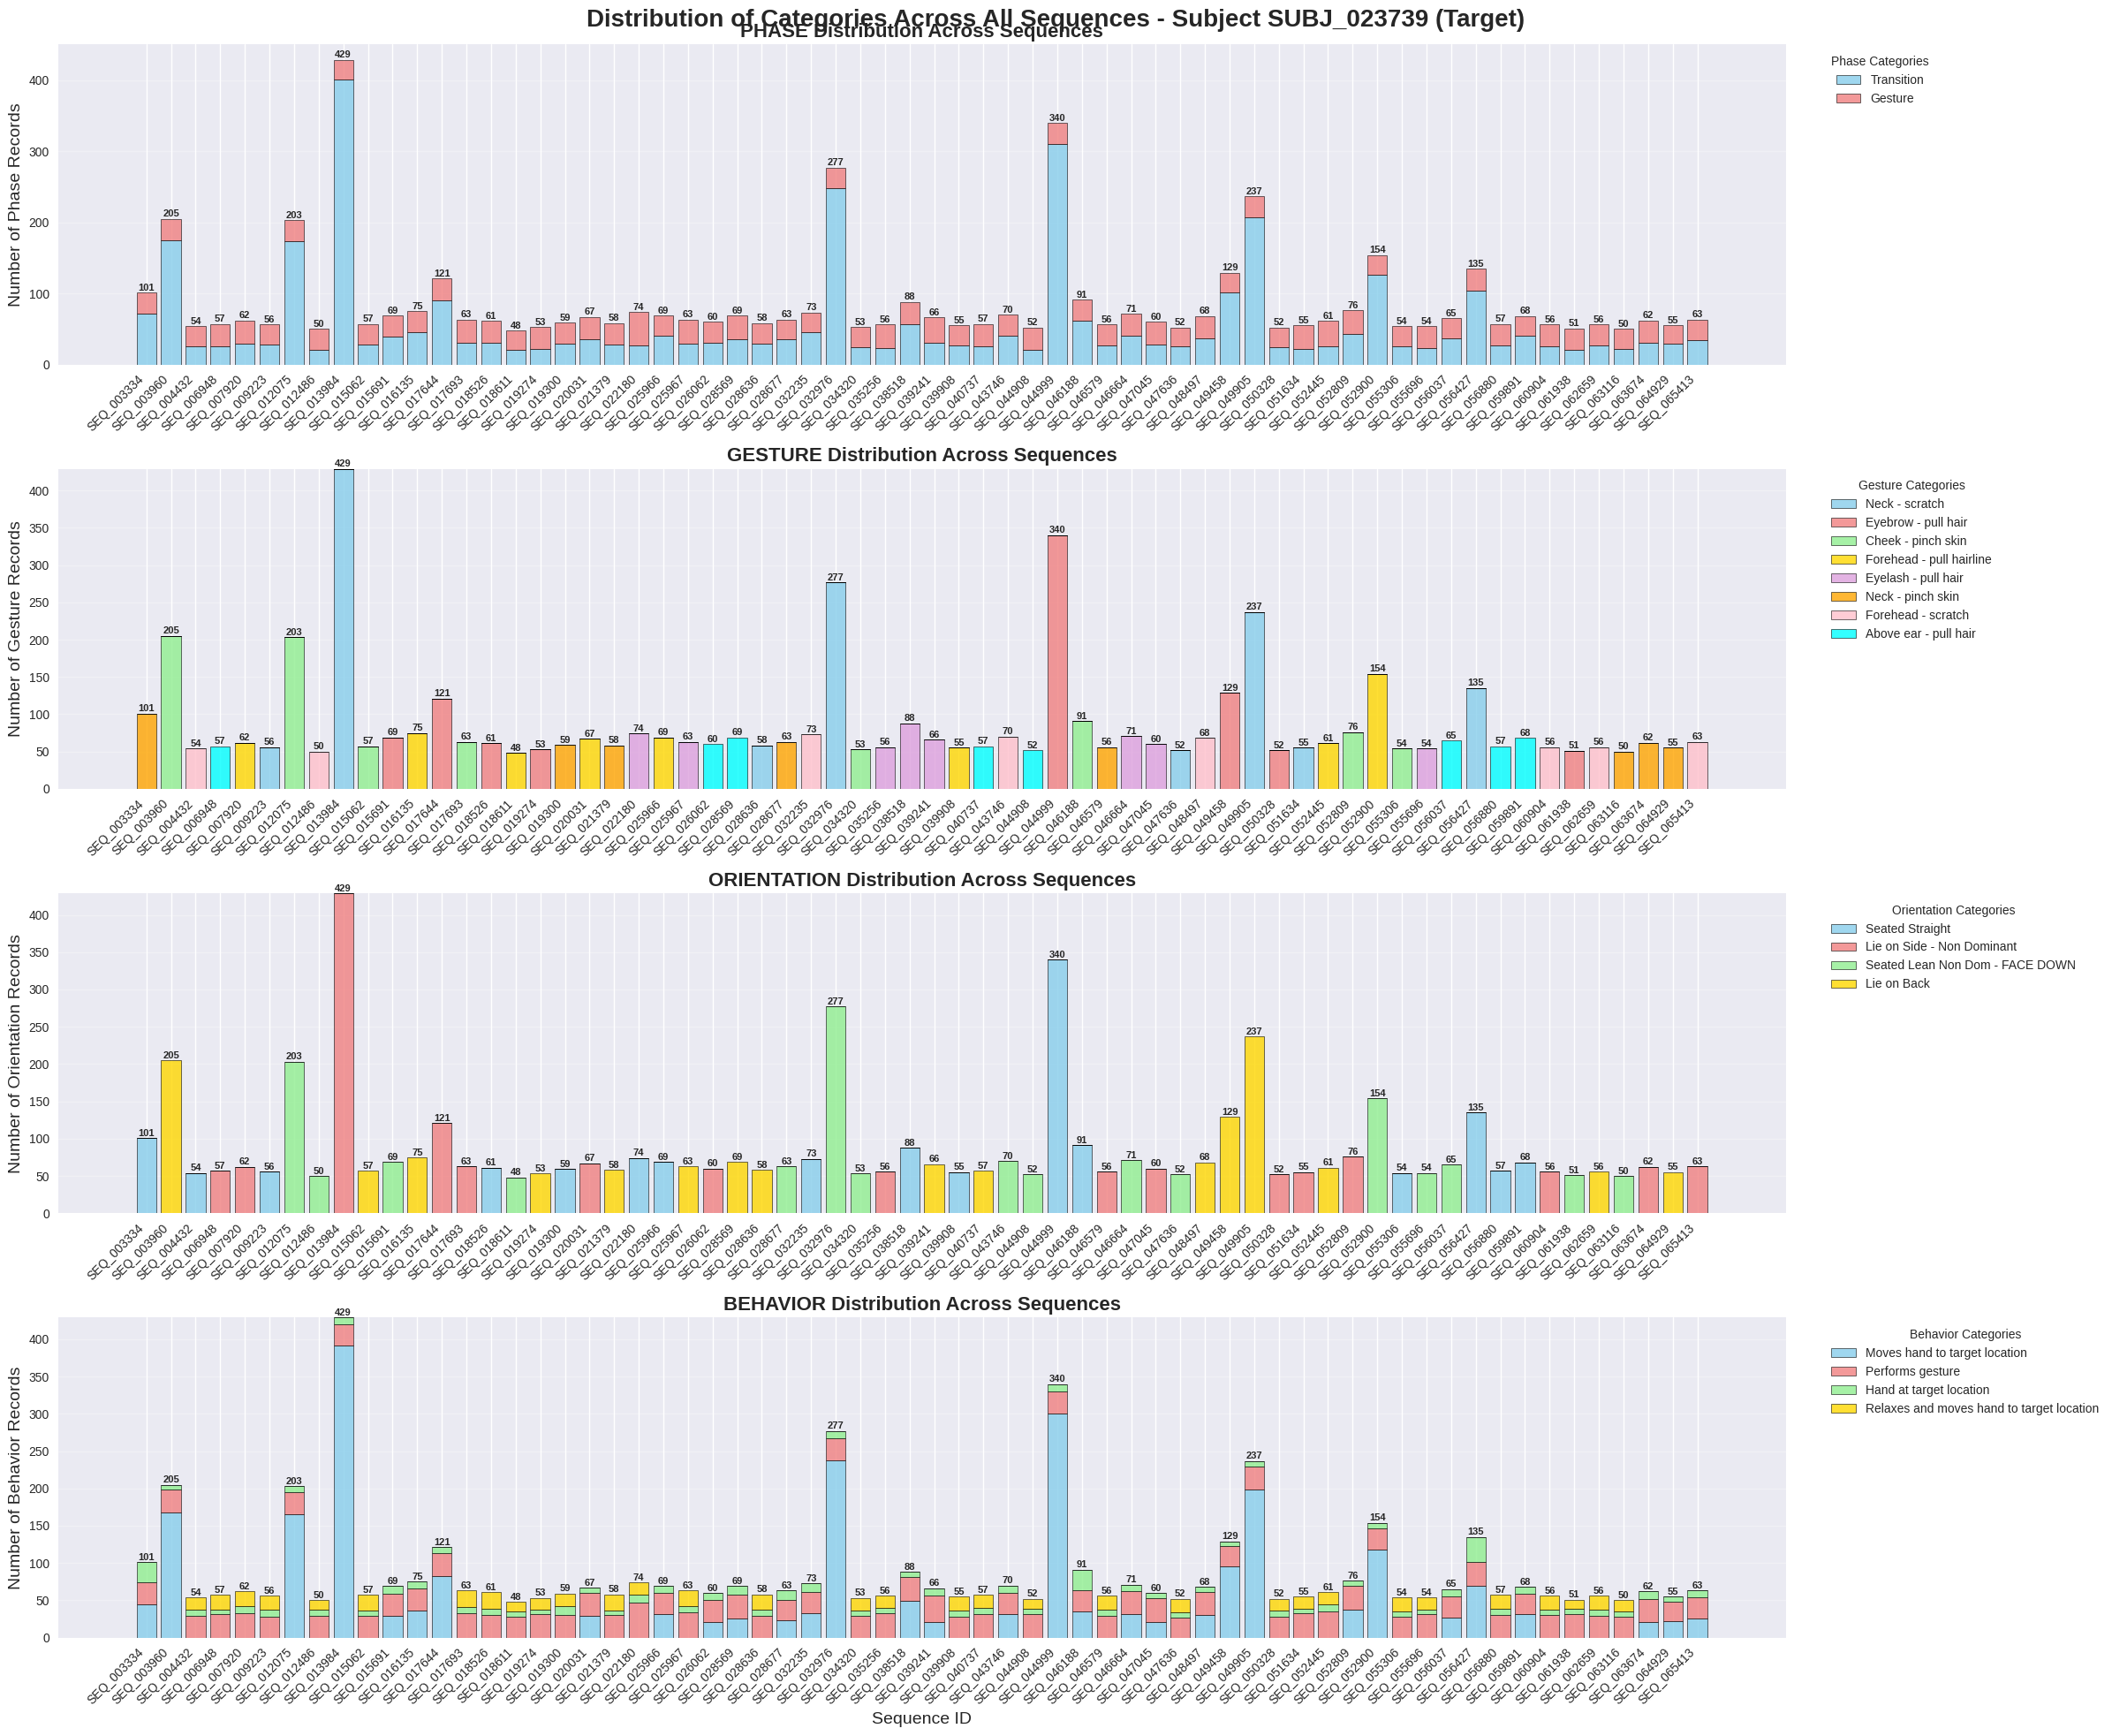


DETAILED SUMMARY FOR EACH CATEGORY

--- PHASE ANALYSIS ---
Total unique phase values: 2
Total null values: 0
Total records: 5579

Top 10 most common phase values:
  1. Transition: 3640 records (65.2%)
  2. Gesture: 1939 records (34.8%)

--- GESTURE ANALYSIS ---
Total unique gesture values: 8
Total null values: 0
Total records: 5579

Top 10 most common gesture values:
  1. Neck - scratch: 1299 records (23.3%)
  2. Eyebrow - pull hair: 876 records (15.7%)
  3. Cheek - pinch skin: 802 records (14.4%)
  4. Forehead - pull hairline: 591 records (10.6%)
  5. Eyelash - pull hair: 532 records (9.5%)
  6. Neck - pinch skin: 504 records (9.0%)
  7. Forehead - scratch: 490 records (8.8%)
  8. Above ear - pull hair: 485 records (8.7%)

--- ORIENTATION ANALYSIS ---
Total unique orientation values: 4
Total null values: 0
Total records: 5579

Top 10 most common orientation values:
  1. Seated Straight: 1435 records (25.7%)
  2. Lie on Side - Non Dominant: 1395 records (25.0%)
  3. Seated Lean Non Do

In [74]:
# Create 4 stacked bar diagrams for phase, gesture, orientation, and behavior
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set up the figure with 4 subplots
fig, axes = plt.subplots(4, 1, figsize=(24, 20))
fig.suptitle('Distribution of Categories Across All Sequences - Subject SUBJ_023739 (Target)', 
             fontsize=20, fontweight='bold')

# Define colors for different categories
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum', 'orange', 'pink', 'cyan', 'lime', 'violet']
null_color = 'black'

# Categories to analyze
categories = ['phase', 'gesture', 'orientation', 'behavior']

for idx, category in enumerate(categories):
    print(f"\n=== Processing {category.upper()} ===")
    
    # Get unique sequence IDs
    sequence_ids = df_SUBJ_023739_target['sequence_id'].unique()
    
    # Create DataFrame to store category counts for each sequence
    category_data = []
    
    for seq_id in sequence_ids:
        seq_data = df_SUBJ_023739_target[df_SUBJ_023739_target['sequence_id'] == seq_id]
        
        # Count categories and null values
        category_counts = seq_data[category].value_counts()
        null_count = seq_data[category].isnull().sum()
        
        # Create a dictionary for this sequence
        seq_dict = {'sequence_id': seq_id}
        
        # Add category counts
        for cat, count in category_counts.items():
            seq_dict[cat] = count
        
        # Add null count
        if null_count > 0:
            seq_dict['NULL'] = null_count
            
        category_data.append(seq_dict)
    
    # Convert to DataFrame
    category_df = pd.DataFrame(category_data)
    category_df = category_df.set_index('sequence_id')
    category_df = category_df.fillna(0)
    
    # Get all unique categories (excluding NULL)
    all_categories = []
    for col in category_df.columns:
        if col != 'NULL':
            all_categories.append(col)
    
    # Sort categories by total frequency
    category_totals = category_df[all_categories].sum().sort_values(ascending=False)
    sorted_categories = category_totals.index.tolist()
    
    # Add NULL at the end if it exists
    if 'NULL' in category_df.columns:
        sorted_categories.append('NULL')
    
    print(f"Found {len(sorted_categories)} unique {category} categories:")
    for cat in sorted_categories:
        total_count = category_df[cat].sum() if cat in category_df.columns else 0
        print(f"  {cat}: {total_count} total records")
    
    # Create stacked bar chart
    x_pos = np.arange(len(sequence_ids))
    bottom = np.zeros(len(sequence_ids))
    
    # Plot each category
    for i, cat in enumerate(sorted_categories):
        if cat in category_df.columns:
            values = category_df[cat].values
            
            # Choose color
            if cat == 'NULL':
                color = null_color
                alpha = 0.8
            else:
                color = colors[i % len(colors)]
                alpha = 0.8
            
            axes[idx].bar(x_pos, values, bottom=bottom, label=cat, 
                         color=color, alpha=alpha, edgecolor='black', linewidth=0.5)
            bottom += values
    
    # Customize subplot
    axes[idx].set_title(f'{category.upper()} Distribution Across Sequences', 
                       fontsize=16, fontweight='bold')
    axes[idx].set_ylabel(f'Number of {category.title()} Records', fontsize=14)
    axes[idx].set_xticks(x_pos)
    axes[idx].set_xticklabels(sequence_ids, rotation=45, ha='right', fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add legend
    axes[idx].legend(title=f'{category.title()} Categories', 
                    bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)
    
    # Add total count labels on bars
    total_counts = category_df.sum(axis=1)
    for i, total in enumerate(total_counts):
        if total > 0:
            axes[idx].text(i, total + 0.5, f'{int(total)}', 
                          ha='center', va='bottom', fontsize=8, fontweight='bold')

# Set x-label for the bottom subplot
axes[-1].set_xlabel('Sequence ID', fontsize=14)

plt.tight_layout()
plt.show()

# Print detailed summary for each category
print("\n" + "="*80)
print("DETAILED SUMMARY FOR EACH CATEGORY")
print("="*80)

for category in categories:
    print(f"\n--- {category.upper()} ANALYSIS ---")
    
    # Get all unique values
    all_values = df_SUBJ_023739_target[category].value_counts()
    null_count = df_SUBJ_023739_target[category].isnull().sum()
    
    print(f"Total unique {category} values: {len(all_values)}")
    print(f"Total null values: {null_count}")
    print(f"Total records: {len(df_SUBJ_023739_target)}")
    
    print(f"\nTop 10 most common {category} values:")
    for i, (value, count) in enumerate(all_values.head(10).items()):
        percentage = (count / len(df_SUBJ_023739_target)) * 100
        print(f"  {i+1}. {value}: {count} records ({percentage:.1f}%)")
    
    if null_count > 0:
        null_percentage = (null_count / len(df_SUBJ_023739_target)) * 100
        print(f"  NULL: {null_count} records ({null_percentage:.1f}%)")


=== Creating detailed plot for PHASE ===


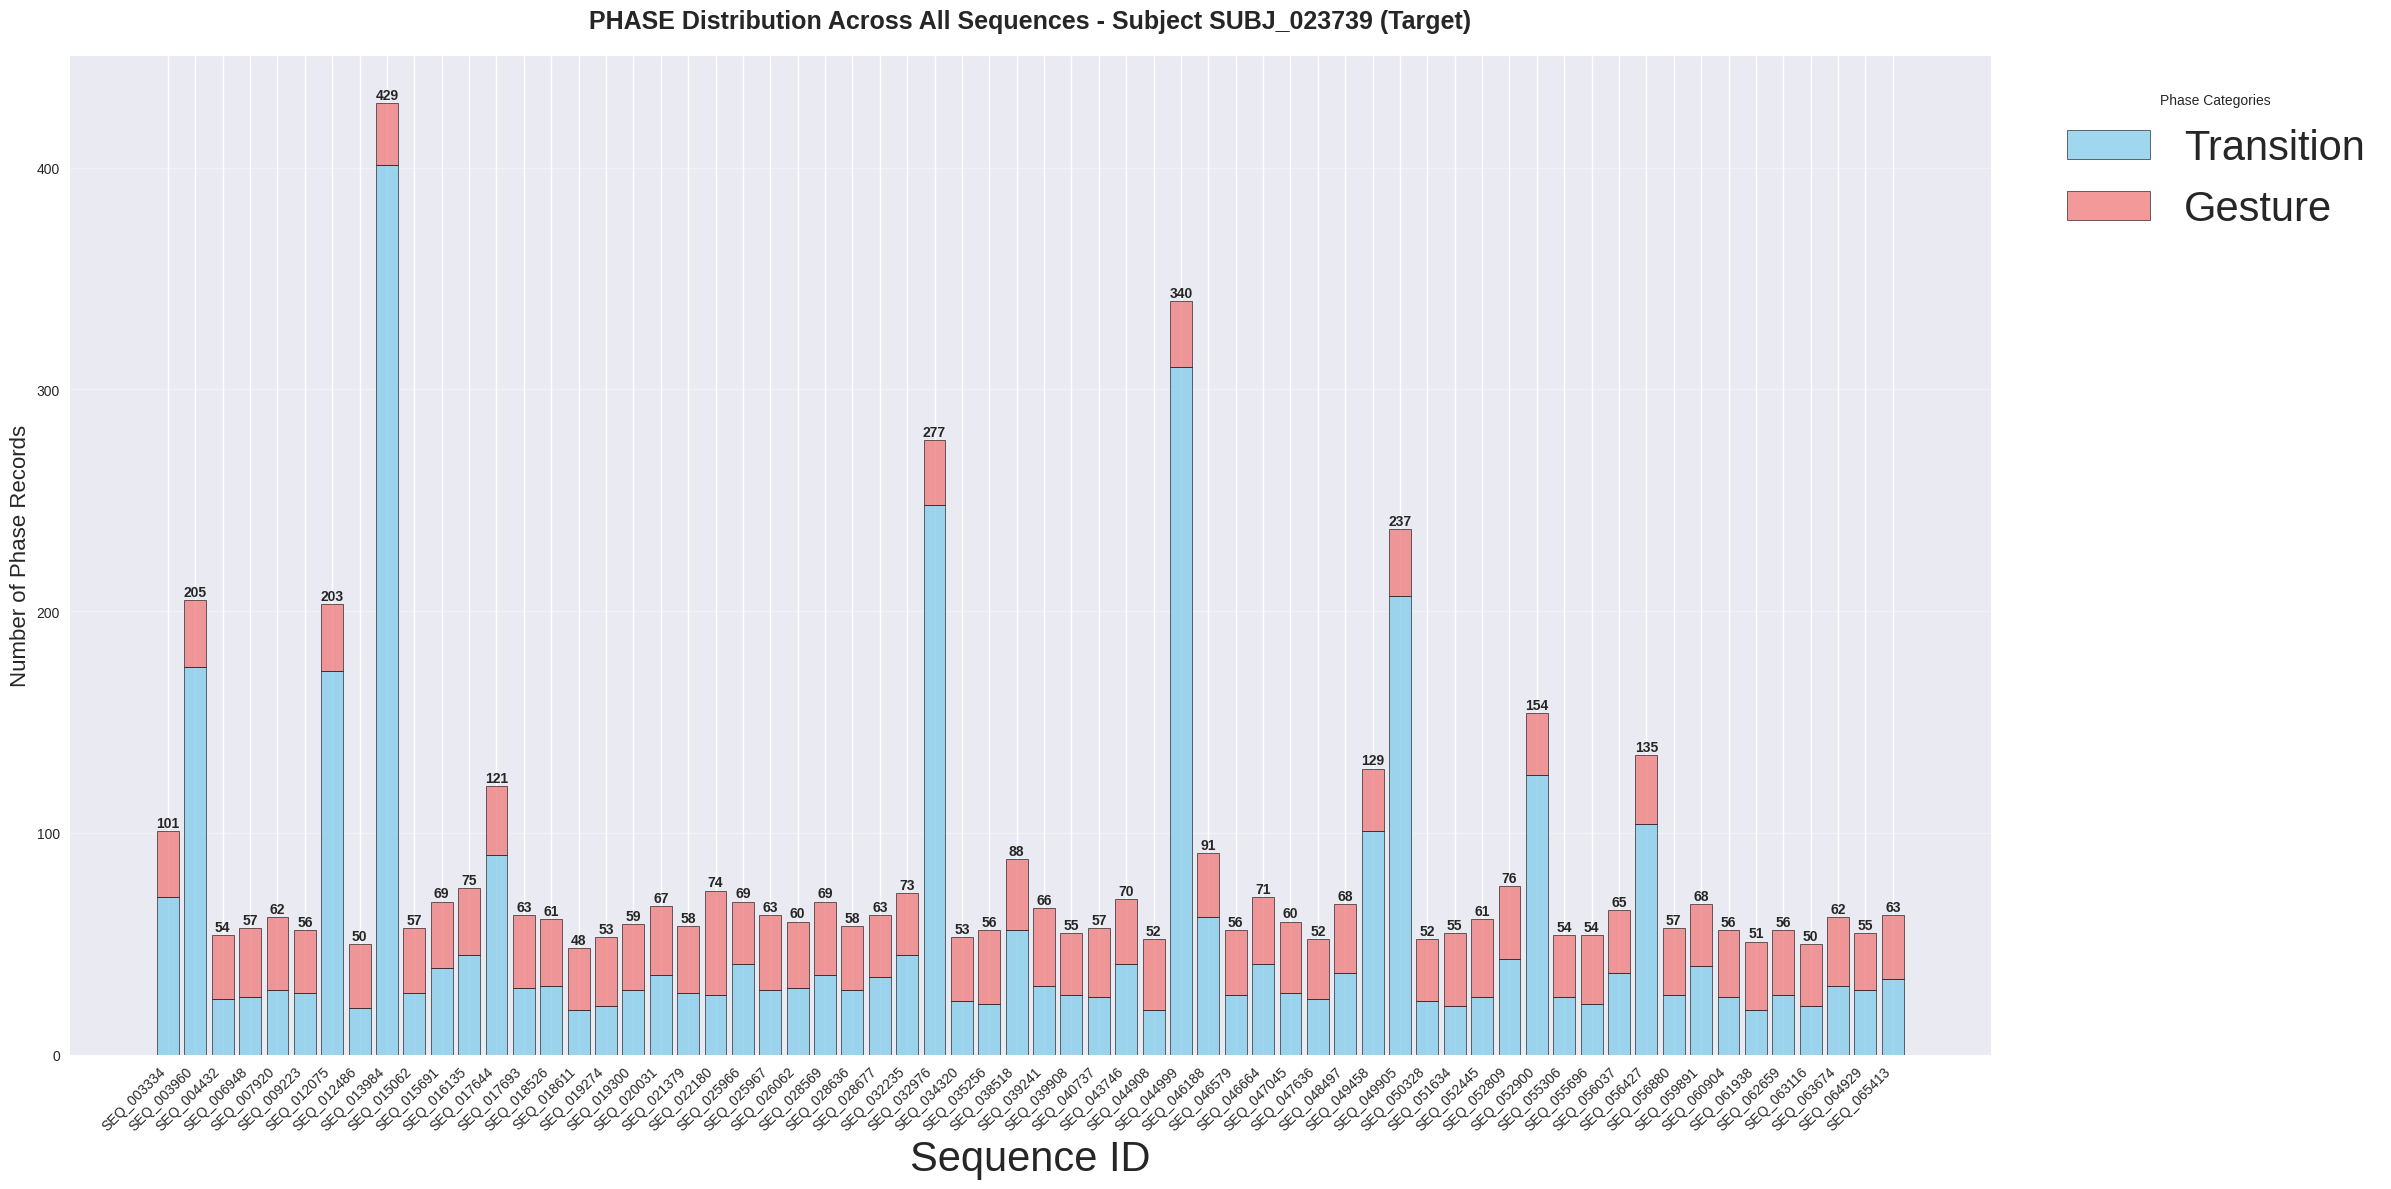

Summary for phase:
  Total unique values: 2
  Sequences with data: 64
  Most common categories: ['Transition', 'Gesture']

=== Creating detailed plot for GESTURE ===


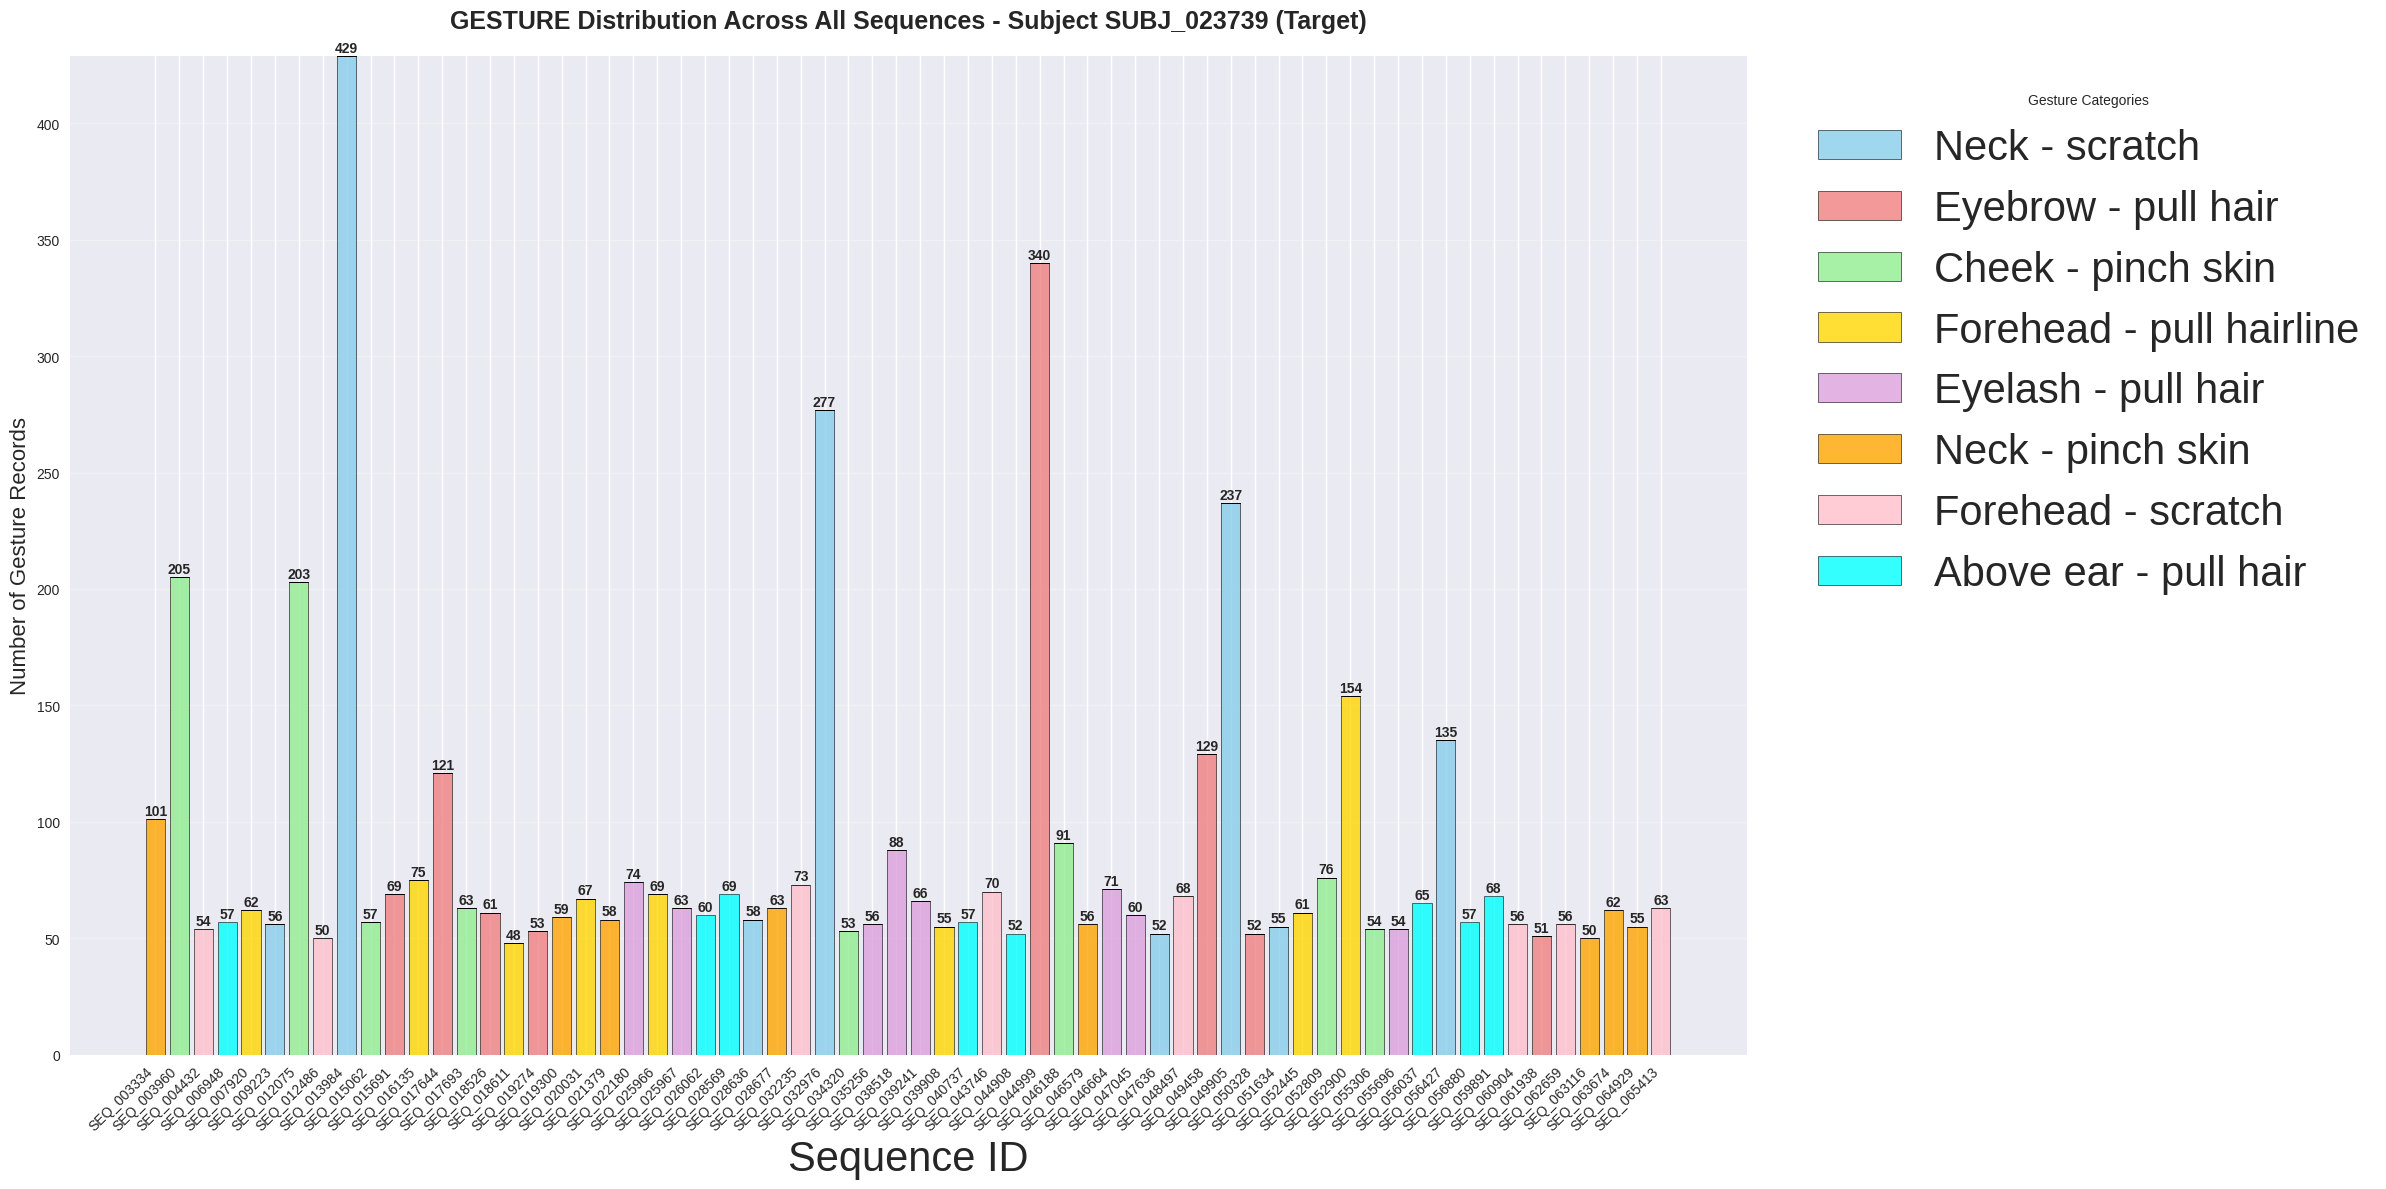

Summary for gesture:
  Total unique values: 8
  Sequences with data: 64
  Most common categories: ['Neck - scratch', 'Eyebrow - pull hair', 'Cheek - pinch skin', 'Forehead - pull hairline', 'Eyelash - pull hair']

=== Creating detailed plot for ORIENTATION ===


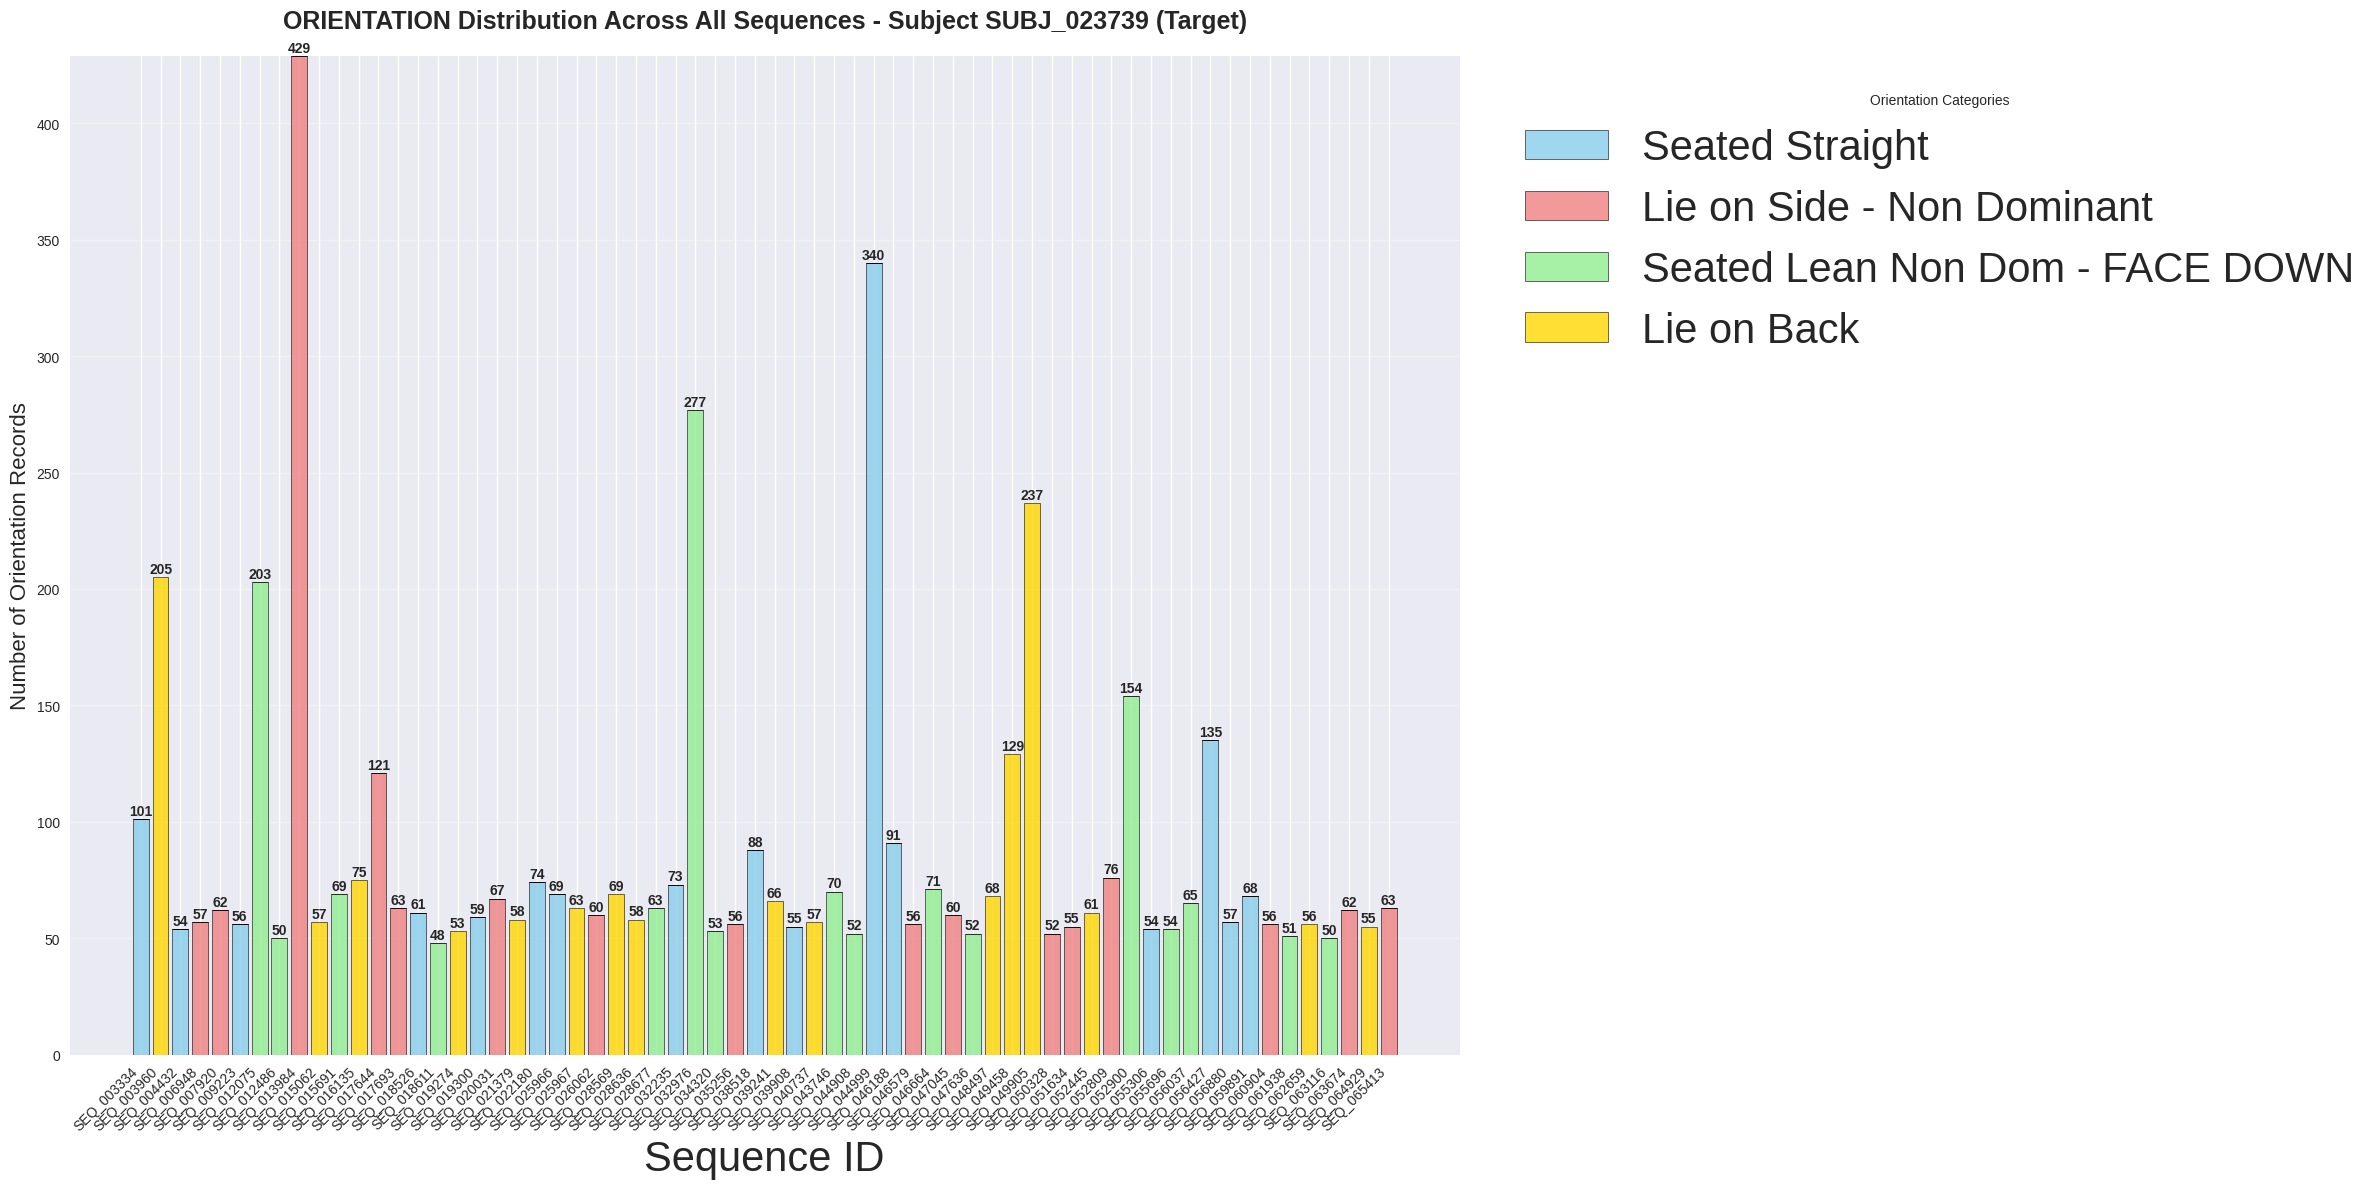

Summary for orientation:
  Total unique values: 4
  Sequences with data: 64
  Most common categories: ['Seated Straight', 'Lie on Side - Non Dominant', 'Seated Lean Non Dom - FACE DOWN', 'Lie on Back']

=== Creating detailed plot for BEHAVIOR ===


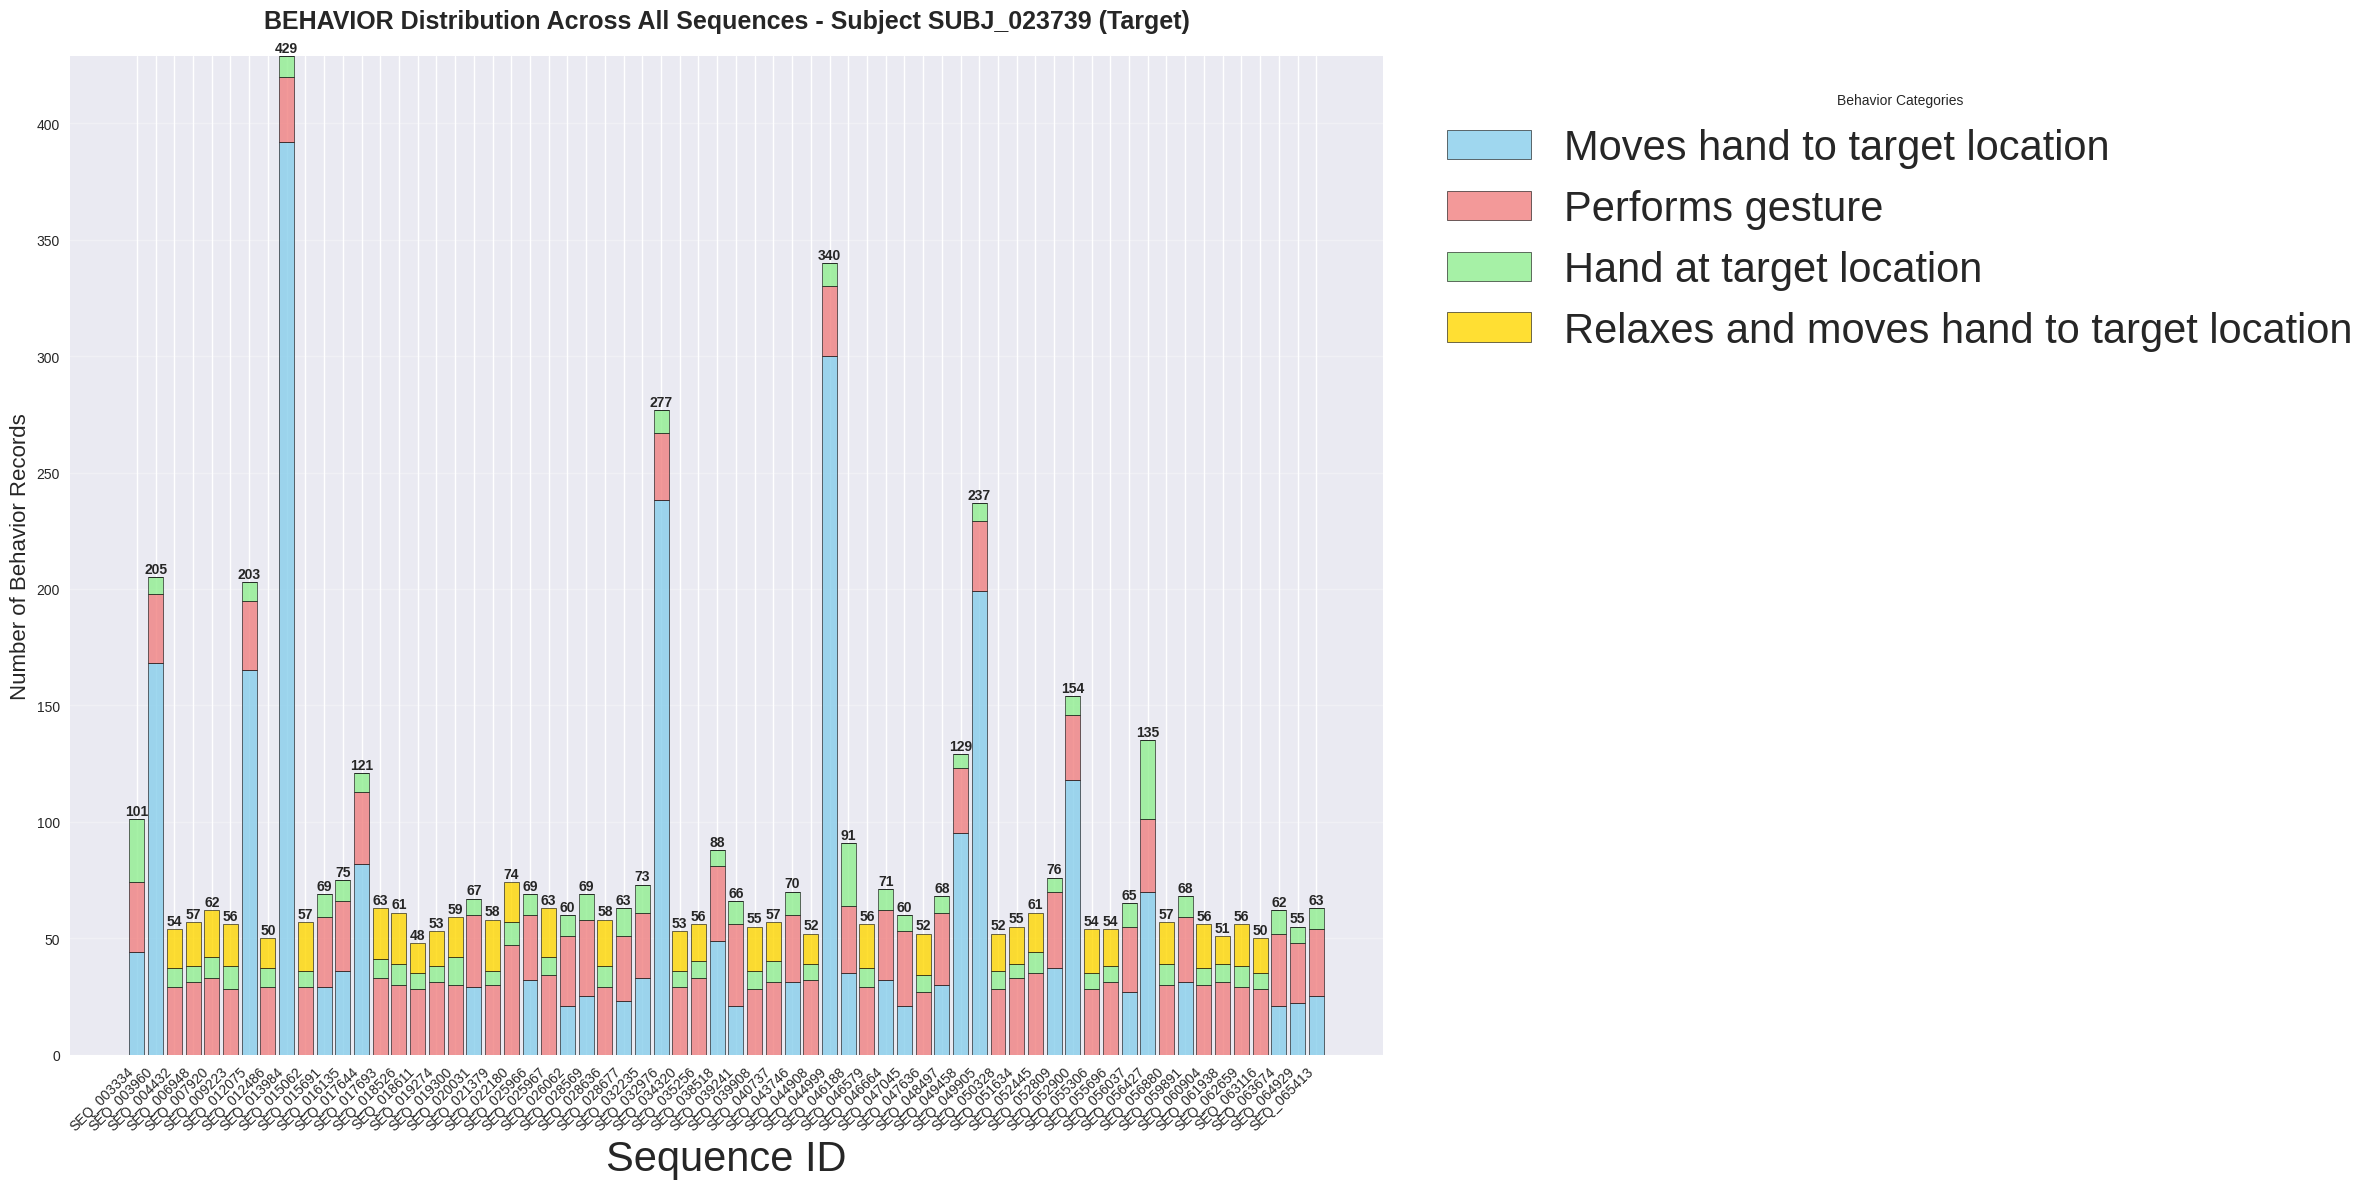

Summary for behavior:
  Total unique values: 4
  Sequences with data: 64
  Most common categories: ['Moves hand to target location', 'Performs gesture', 'Hand at target location', 'Relaxes and moves hand to target location']


In [78]:
# Create individual large plots for better detail
for category in categories:
    print(f"\n=== Creating detailed plot for {category.upper()} ===")
    
    # Create large figure for this category
    plt.figure(figsize=(24, 12))
    
    # Get sequence IDs
    sequence_ids = df_SUBJ_023739_target['sequence_id'].unique()
    
    # Create category data
    category_data = []
    for seq_id in sequence_ids:
        seq_data = df_SUBJ_023739_target[df_SUBJ_023739_target['sequence_id'] == seq_id]
        category_counts = seq_data[category].value_counts()
        null_count = seq_data[category].isnull().sum()
        
        seq_dict = {'sequence_id': seq_id}
        for cat, count in category_counts.items():
            seq_dict[cat] = count
        if null_count > 0:
            seq_dict['NULL'] = null_count
        category_data.append(seq_dict)
    
    category_df = pd.DataFrame(category_data)
    category_df = category_df.set_index('sequence_id')
    category_df = category_df.fillna(0)
    
    # Get sorted categories
    all_categories = [col for col in category_df.columns if col != 'NULL']
    category_totals = category_df[all_categories].sum().sort_values(ascending=False)
    sorted_categories = category_totals.index.tolist()
    if 'NULL' in category_df.columns:
        sorted_categories.append('NULL')
    
    # Create stacked bars
    x_pos = np.arange(len(sequence_ids))
    bottom = np.zeros(len(sequence_ids))
    
    for i, cat in enumerate(sorted_categories):
        if cat in category_df.columns:
            values = category_df[cat].values
            color = null_color if cat == 'NULL' else colors[i % len(colors)]
            alpha = 0.8
            
            plt.bar(x_pos, values, bottom=bottom, label=cat, 
                   color=color, alpha=alpha, edgecolor='black', linewidth=0.5)
            bottom += values
    
    # Customize plot
    plt.title(f'{category.upper()} Distribution Across All Sequences - Subject SUBJ_023739 (Target)', 
              fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Sequence ID', fontsize=30)
    plt.ylabel(f'Number of {category.title()} Records', fontsize=16)
    plt.xticks(x_pos, sequence_ids, rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    
    # Add legend
    plt.legend(title=f'{category.title()} Categories', 
              bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=30)
    
    # Add value labels
    total_counts = category_df.sum(axis=1)
    for i, total in enumerate(total_counts):
        if total > 0:
            plt.text(i, total + 0.5, f'{int(total)}', 
                    ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary for this category
    print(f"Summary for {category}:")
    print(f"  Total unique values: {len(sorted_categories)}")
    print(f"  Sequences with data: {len(category_df)}")
    print(f"  Most common categories: {sorted_categories[:5]}")

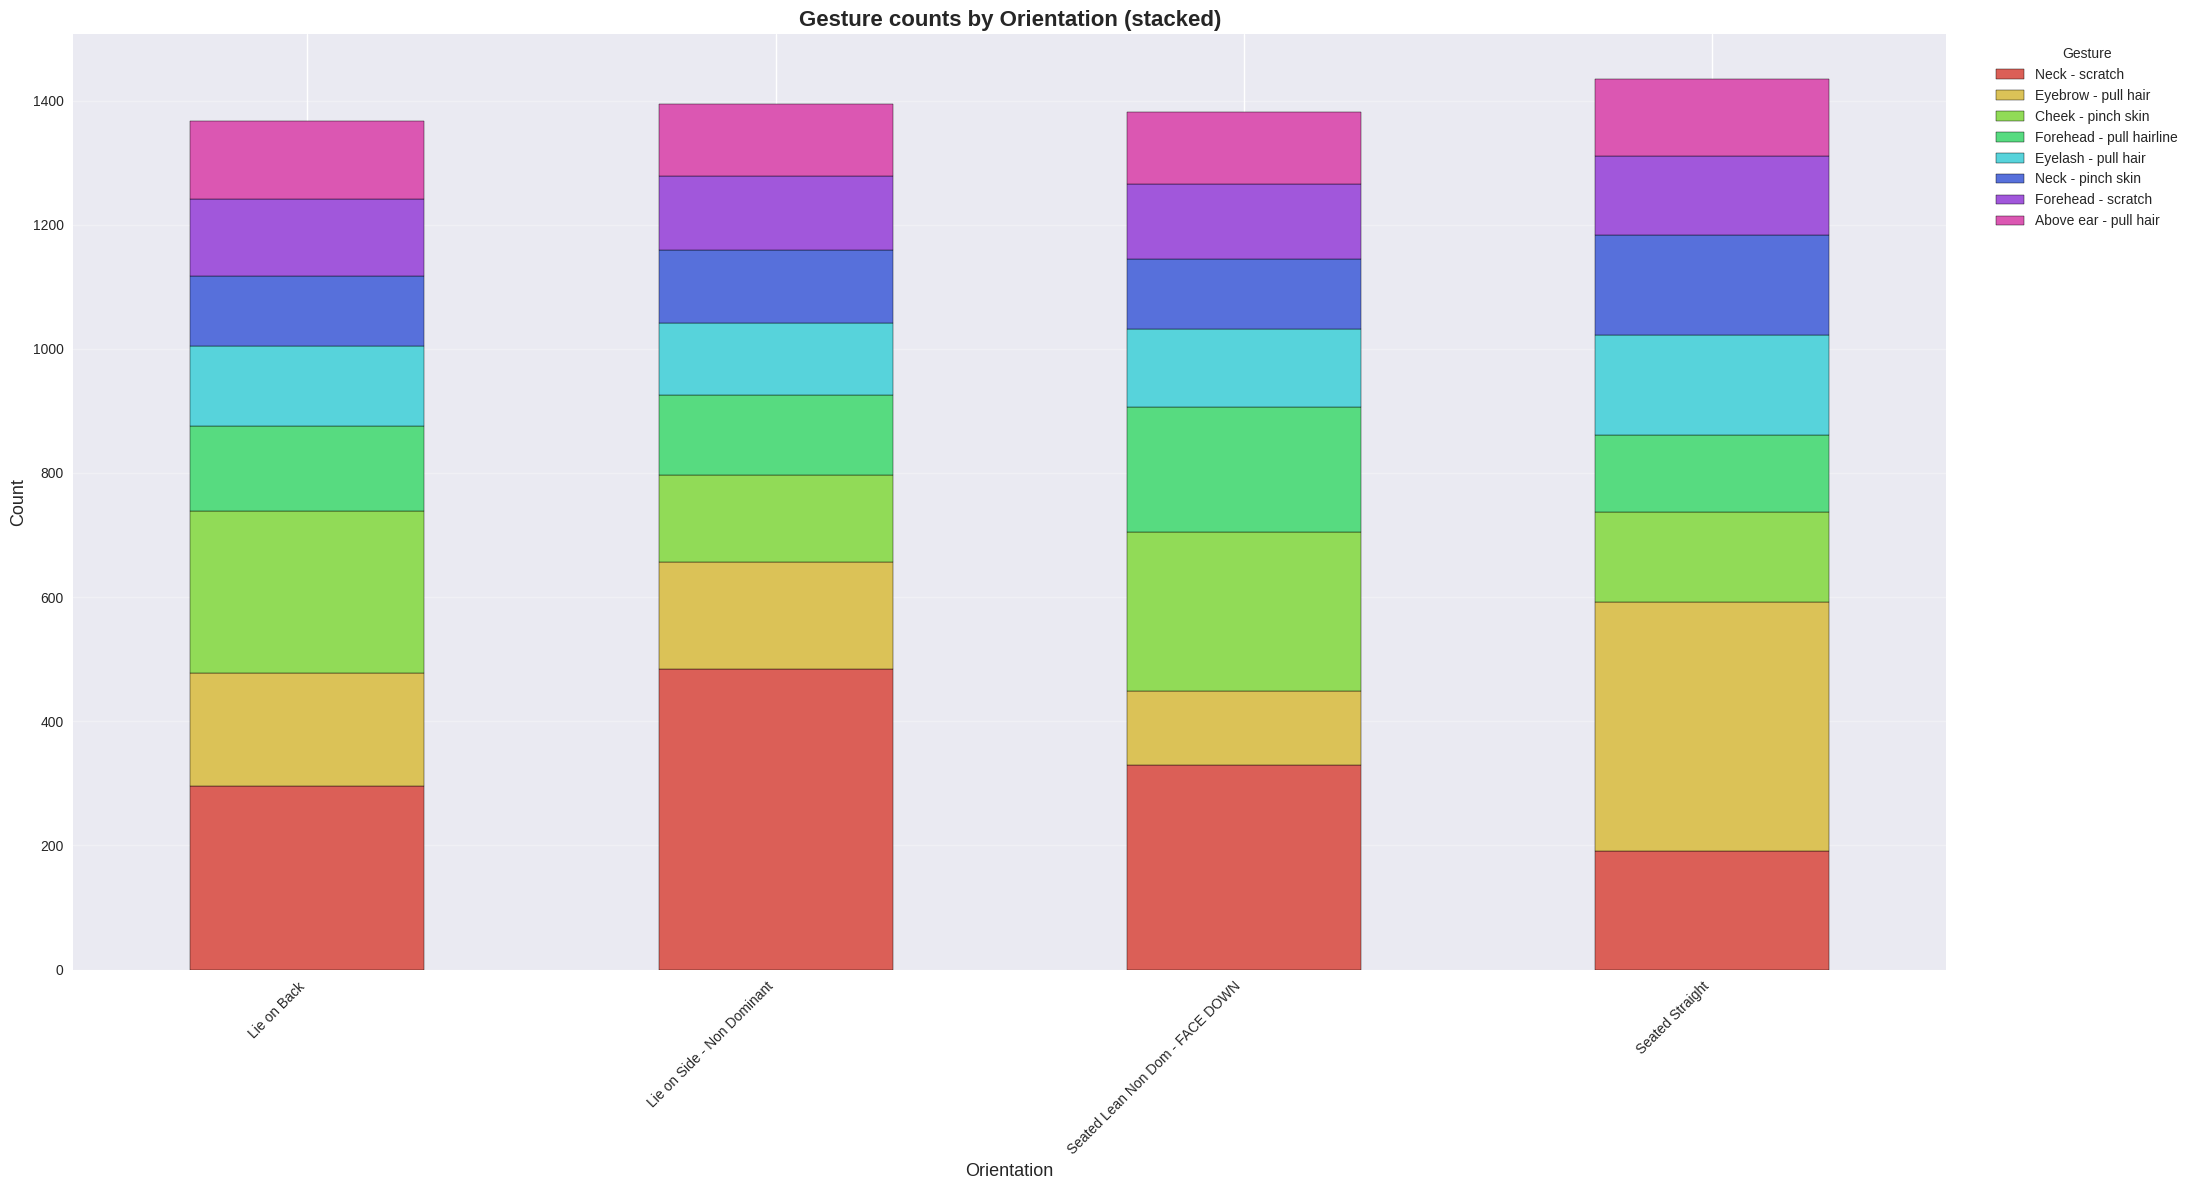

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prep
df = df_SUBJ_023739_target.copy()
df['orientation'] = df['orientation'].fillna('NULL')
df['gesture'] = df['gesture'].fillna('NULL')

# Orientation x Gesture counts
ct = pd.pivot_table(
    df, index='orientation', columns='gesture',
    values='row_id', aggfunc='size', fill_value=0
)

# Order gestures by total frequency
gesture_order = ct.sum(axis=0).sort_values(ascending=False).index
ct = ct[gesture_order]

# Colors (NULL in black)
gestures = ct.columns.tolist()
palette = sns.color_palette('hls', len(gestures))
color_map = dict(zip(gestures, palette))
if 'NULL' in color_map:
    color_map['NULL'] = (0, 0, 0)
colors = [color_map[g] for g in gestures]

# Plot
ax = ct.plot(
    kind='bar', stacked=True, figsize=(22, 12),
    color=colors, edgecolor='black', linewidth=0.3
)
ax.set_title('Gesture counts by Orientation (stacked)', fontsize=16, fontweight='bold')
ax.set_xlabel('Orientation', fontsize=13)
ax.set_ylabel('Count', fontsize=13)
ax.grid(axis='y', alpha=0.3)
ax.legend(title='Gesture', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [80]:
df_train['sequence_id'].value_counts()

sequence_id
SEQ_015261    700
SEQ_014205    671
SEQ_028188    647
SEQ_060593    630
SEQ_016031    567
             ... 
SEQ_011271     34
SEQ_032114     34
SEQ_022667     34
SEQ_059162     34
SEQ_009199     29
Name: count, Length: 8151, dtype: int64

In [81]:
df_train_demographics = pd.read_csv('/home/ankur/Desktop/ML_DL_Projects/data/cmi-detect-behavior-with-sensor-data/train_demographics.csv')
df_train_demographics.head()


subject  adult_child  age  sex  handedness  height_cm  \
0  SUBJ_000206            1   41    1           1      172.0   
1  SUBJ_001430            0   11    0           1      167.0   
2  SUBJ_002923            1   28    1           0      164.0   
3  SUBJ_003328            1   33    1           1      171.0   
4  SUBJ_004117            0   15    0           1      184.0   

   shoulder_to_wrist_cm  elbow_to_wrist_cm  
0                    50               25.0  
1                    51               27.0  
2                    54               26.0  
3                    52               25.0  
4                    54               28.0

In [99]:
df_merged_train  = pd.merge(df_train, df_train_demographics, on='subject', how='left')

In [100]:
df_merged_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574945 entries, 0 to 574944
Columns: 348 entries, row_id to elbow_to_wrist_cm
dtypes: float64(334), int64(6), object(8)
memory usage: 1.5+ GB


In [101]:
df_merged_train.info()
df_merged_train['sequence_type'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574945 entries, 0 to 574944
Columns: 348 entries, row_id to elbow_to_wrist_cm
dtypes: float64(334), int64(6), object(8)
memory usage: 1.5+ GB


sequence_type
Target        344058
Non-Target    230887
Name: count, dtype: int64

In [102]:
df_test = pd.read_csv('/home/ankur/Desktop/ML_DL_Projects/data/cmi-detect-behavior-with-sensor-data/test.csv')
df_test_demographics = pd.read_csv('/home/ankur/Desktop/ML_DL_Projects/data/cmi-detect-behavior-with-sensor-data/test_demographics.csv')
merged_test = pd.merge(df_test, df_test_demographics, on='subject', how='left')
merged_test.head()

row_id sequence_id  sequence_counter      subject      acc_x  \
0  SEQ_000001_000000  SEQ_000001                 0  SUBJ_055840   9.039062   
1  SEQ_000001_000001  SEQ_000001                 1  SUBJ_055840   9.421875   
2  SEQ_000001_000002  SEQ_000001                 2  SUBJ_055840  10.160156   
3  SEQ_000001_000003  SEQ_000001                 3  SUBJ_055840   9.773438   
4  SEQ_000001_000004  SEQ_000001                 4  SUBJ_055840   9.195312   

      acc_y     acc_z     rot_w     rot_x     rot_y  ...  tof_5_v61  \
0  5.261719  0.800781  0.367188 -0.397400 -0.629028  ...       -1.0   
1  3.460938 -1.113281  0.353882 -0.507141 -0.652710  ...      211.0   
2  2.082031 -3.871094  0.384094 -0.532104 -0.639648  ...       -1.0   
3  1.355469 -4.371094  0.387756 -0.531982 -0.634033  ...       -1.0   
4  1.011719 -3.222656  0.382751 -0.534180 -0.638367  ...       -1.0   

   tof_5_v62  tof_5_v63  adult_child  age  sex  handedness  height_cm  \
0      111.0       -1.0            0   13    0           1      177.0   
1      187.0      178.0            0   13    0           1      177.0   
2      197.0      177.0            0   13    0           1      177.0   
3      197.0      183.0            0   13    0           1      177.0   
4      200.0      173.0            0   13    0           1      177.0   

   shoulder_to_wrist_cm  elbow_to_wrist_cm  
0                    52               27.0  
1                    52               27.0  
2                    52               27.0  
3                    52               27.0  
4                    52               27.0  

[5 rows x 343 columns]

In [110]:
common_features = list( df_merged_train.columns.intersection(merged_test.columns))
print(len(common_features))
common_features.extend(['sequence_type'])
print(len(common_features))

df_features = df_merged_train[common_features]
df_features.info()



343
344
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574945 entries, 0 to 574944
Columns: 344 entries, row_id to sequence_type
dtypes: float64(334), int64(6), object(4)
memory usage: 1.5+ GB


In [111]:
df_features['sequence_type'].value_counts()

sequence_type
Target        344058
Non-Target    230887
Name: count, dtype: int64

In [89]:

# Example: df is your DataFrame
summary = pd.DataFrame({
    'num_unique': df_features.nunique(),
    'num_missing': df_features.isnull().sum(),
    'pct_missing': df_features.isnull().mean() * 100
})

# Show summary
print(summary)

# For categorical-like columns: show top frequencies
for col in df_features.columns:
    unique_count = df_features[col].nunique(dropna=True)
    if unique_count < 20:  # threshold for "categorical"
        print(f"\nColumn: {col}  (unique={unique_count})")
        print(df_features[col].value_counts(dropna=False))


                      num_unique  num_missing  pct_missing
row_id                    574945            0          0.0
sequence_id                 8151            0          0.0
sequence_counter             700            0          0.0
subject                       81            0          0.0
acc_x                       8225            0          0.0
...                          ...          ...          ...
sex                            2            0          0.0
handedness                     2            0          0.0
height_cm                     37            0          0.0
shoulder_to_wrist_cm          21            0          0.0
elbow_to_wrist_cm             12            0          0.0

[343 rows x 3 columns]

Column: adult_child  (unique=2)
adult_child
1    290085
0    284860
Name: count, dtype: int64

Column: sex  (unique=2)
sex
1    345109
0    229836
Name: count, dtype: int64

Column: handedness  (unique=2)
handedness
1    503593
0     71352
Name: count, dtype: int64



In [90]:
print(summary)


                      num_unique  num_missing  pct_missing
row_id                    574945            0          0.0
sequence_id                 8151            0          0.0
sequence_counter             700            0          0.0
subject                       81            0          0.0
acc_x                       8225            0          0.0
...                          ...          ...          ...
sex                            2            0          0.0
handedness                     2            0          0.0
height_cm                     37            0          0.0
shoulder_to_wrist_cm          21            0          0.0
elbow_to_wrist_cm             12            0          0.0

[343 rows x 3 columns]


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = df_features.copy()

# 1) Column-wise summary
summary = pd.DataFrame({
    'column': df.columns,
    'dtype': df.dtypes.astype(str),
    'n_unique_non_null': [df[c].nunique(dropna=True) for c in df.columns],
    'n_missing': df.isna().sum().values,
})
summary['missing_pct'] = (summary['n_missing'] / len(df)) * 100
# Heuristic: treat low-cardinality numerics as categorical too (adjust threshold if needed)
summary['is_categorical'] = summary['dtype'].isin(['object', 'category']) | (summary['n_unique_non_null'] <= 20)
summary = summary.sort_values(['is_categorical', 'n_unique_non_null'], ascending=[False, False]).reset_index(drop=True)

display(summary.head(50))  # peek
# Optional: save the full summary
# summary.to_csv('column_summary.csv', index=False)

column    dtype  n_unique_non_null  n_missing  missing_pct  \
0              row_id   object             574945          0     0.000000   
1         sequence_id   object               8151          0     0.000000   
2             subject   object                 81          0     0.000000   
3   elbow_to_wrist_cm  float64                 12          0     0.000000   
4         adult_child    int64                  2          0     0.000000   
5                 sex    int64                  2          0     0.000000   
6          handedness    int64                  2          0     0.000000   
7               thm_2  float64             455432       7638     1.328475   
8               thm_1  float64             439180       6987     1.215247   
9               thm_3  float64             421778       6472     1.125673   
10              thm_5  float64             388894      33286     5.789423   
11              thm_4  float64             376161       6224     1.082538   
12              rot_y  float64              32720       3692     0.642148   
13              rot_x  float64              32568       3692     0.642148   
14              rot_z  float64              32317       3692     0.642148   
15              rot_w  float64              16180       3692     0.642148   
16              acc_x  float64               8225          0     0.000000   
17              acc_z  float64               7933          0     0.000000   
18              acc_y  float64               6497          0     0.000000   
19   sequence_counter    int64                700          0     0.000000   
20           tof_1_v0  float64                251       6224     1.082538   
21           tof_1_v1  float64                251       6224     1.082538   
22           tof_1_v2  float64                251       6224     1.082538   
23           tof_1_v3  float64                251       6224     1.082538   
24           tof_1_v4  float64                251       6224     1.082538   
25           tof_1_v5  float64                251       6224     1.082538   
26           tof_1_v6  float64                251       6224     1.082538   
27           tof_1_v7  float64                251       6224     1.082538   
28           tof_1_v8  float64                251       6224     1.082538   
29           tof_1_v9  float64                251       6224     1.082538   
30          tof_1_v10  float64                251       6224     1.082538   
31          tof_1_v11  float64                251       6224     1.082538   
32          tof_1_v12  float64                251       6224     1.082538   
33          tof_1_v13  float64                251       6224     1.082538   
34          tof_1_v14  float64                251       6224     1.082538   
35          tof_1_v15  float64                251       6224     1.082538   
36          tof_1_v16  float64                251       6224     1.082538   
37          tof_1_v17  float64                251       6224     1.082538   
38          tof_1_v18  float64                251       6224     1.082538   
39          tof_1_v19  float64                251       6224     1.082538   
40          tof_1_v20  float64                251       6224     1.082538   
41          tof_1_v21  float64                251       6224     1.082538   
42          tof_1_v22  float64                251       6224     1.082538   
43          tof_1_v23  float64                251       6224     1.082538   
44          tof_1_v24  float64                251       6224     1.082538   
45          tof_1_v25  float64                251       6224     1.082538   
46          tof_1_v26  float64                251       6224     1.082538   
47          tof_1_v27  float64                251       6224     1.082538   
48          tof_1_v28  float64                251       6224     1.082538   
49          tof_1_v29  float64                251       6224     1.082538   

    is_categorical  
0             True  
1             True  
2             True  
3  

In [112]:
df_features 

row_id sequence_id  sequence_counter      subject  \
0       SEQ_000007_000000  SEQ_000007                 0  SUBJ_059520   
1       SEQ_000007_000001  SEQ_000007                 1  SUBJ_059520   
2       SEQ_000007_000002  SEQ_000007                 2  SUBJ_059520   
3       SEQ_000007_000003  SEQ_000007                 3  SUBJ_059520   
4       SEQ_000007_000004  SEQ_000007                 4  SUBJ_059520   
...                   ...         ...               ...          ...   
574940  SEQ_065531_000048  SEQ_065531                48  SUBJ_039498   
574941  SEQ_065531_000049  SEQ_065531                49  SUBJ_039498   
574942  SEQ_065531_000050  SEQ_065531                50  SUBJ_039498   
574943  SEQ_065531_000051  SEQ_065531                51  SUBJ_039498   
574944  SEQ_065531_000052  SEQ_065531                52  SUBJ_039498   

           acc_x     acc_y     acc_z     rot_w     rot_x     rot_y  ...  \
0       6.683594  6.214844  3.355469  0.134399 -0.355164 -0.447327  ...   
1       6.949219  6.214844  3.125000  0.143494 -0.340271 -0.428650  ...   
2       5.722656  5.410156  5.421875  0.219055 -0.274231 -0.356934  ...   
3       6.601562  3.531250  6.457031  0.297546 -0.264160 -0.238159  ...   
4       5.566406  0.277344  9.632812  0.333557 -0.218628 -0.063538  ...   
...          ...       ...       ...       ...       ...       ...  ...   
574940  3.503906 -0.433594 -8.441406  0.106628 -0.862488 -0.470825  ...   
574941  3.773438 -0.664062 -9.207031  0.110596 -0.865417 -0.460327  ...   
574942  3.082031  0.218750 -7.402344  0.113159 -0.864258 -0.461182  ...   
574943  3.964844 -0.359375 -9.085938  0.117493 -0.866760 -0.450623  ...   
574944  4.269531 -0.933594 -9.628906  0.112427 -0.868225 -0.451721  ...   

        tof_5_v62  tof_5_v63  adult_child  age  sex  handedness  height_cm  \
0            -1.0       -1.0            0   12    1           1      163.0   
1            -1.0       -1.0            0   12    1           1      163.0   
2            -1.0       -1.0            0   12    1           1      163.0   
3            -1.0       -1.0            0   12    1           1      163.0   
4            -1.0       -1.0            0   12    1           1      163.0   
...           ...        ...          ...  ...  ...         ...        ...   
574940       -1.0       71.0            1   30    0           1      186.0   
574941       -1.0       -1.0            1   30    0           1      186.0   
574942       -1.0       -1.0            1   30    0           1      186.0   
574943       -1.0       -1.0            1   30    0           1      186.0   
574944       -1.0       -1.0            1   30    0           1      186.0   

        shoulder_to_wrist_cm  elbow_to_wrist_cm  sequence_type  
0                         52               24.0         Target  
1                         52               24.0         Target  
2                         52               24.0         Target  
3                         52               24.0         Target  
4                         52               24.0         Target  
...                      ...                ...            ...  
574940                    55               30.0     Non-Target  
574941                    55               30.0     Non-Target  
574942                    55               30.0     Non-Target  
574943                    55               30.0     Non-Target  
574944                    55               30.0     Non-Target  

[574945 rows x 344 columns]

In [2]:
categorical_cols = df_features.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = df_features.select_dtypes(include=[np.number]).columns.tolist()

print("Categorical / Feature columns:", categorical_cols)
print("Numeric columns:", numeric_cols)

NameError: name 'df_features' is not defined